# Predicting the likelihood of the person having a bank account or not
## (Yes = 1, No = 0)

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [2]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

In [3]:
# Set seed for reproducability
SEED = 2023
# random.seed(SEED)
np.random.seed(SEED)

In [4]:
# Load files into a pandas dataframe
path = '../'
train = pd.read_csv(path + 'Train.csv')
test = pd.read_csv(path + 'Test.csv')
ss = pd.read_csv(path + 'SampleSubmission.csv')
variables = pd.read_csv(path + 'VariableDefinitions.csv')

## Data Preprocessing

In [5]:
uniqueid = test['uniqueid']
country = test['country']

In [6]:
cols_obj = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
                 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

In [7]:
def group_age(data):
    i=0
    for row in data.age_of_respondent:
        if 0 <= row <= 20:
            data.age_of_respondent.loc[i] = "0"
        if 21 <= row <= 40:
            data.age_of_respondent.loc[i] = "1"
        if 41 <= row <= 60:
            data.age_of_respondent.loc[i] = "2"
        if 61 <= row <= 80:
            data.age_of_respondent.loc[i] = "3"
        if 51 <= row <= 100:
            data.age_of_respondent.loc[i] = "4"
#         if 61 <= row <= 70:
#             data.age_of_respondent.loc[i] = "5"
#         if 71 <= row <= 80:
#             data.age_of_respondent.loc[i] = "6"
#         if 81 <= row <= 90:
#             data.age_of_respondent.loc[i] = "7"
#         if 91 <= row <= 100:
#             data.age_of_respondent.loc[i] = "8"
        i+=1
    data["age_of_respondent"] = pd.to_numeric(data["age_of_respondent"])
    return data

In [8]:
def group_household(data):
    i=0
    for row in data.household_size:
        if 0 <= row <= 3:
            data.household_size.loc[i] = "0"
        if 4 <= row <= 6:
            data.household_size.loc[i] = "1"
        if 7 <= row <= 9:
            data.household_size.loc[i] = "2"
        if 10 <= row <= 12:
            data.household_size.loc[i] = "3"
        if 13 <= row <= 15:
            data.household_size.loc[i] = "4"
        if 16 <= row <= 18:
            data.household_size.loc[i] = "5"
        if 19 <= row <= 21:
            data.household_size.loc[i] = "6"
        i+=1
    data["household_size"] = pd.to_numeric(data["household_size"])
    return data

In [9]:
test.household_size.unique()

array([ 3,  7,  6,  4,  1,  5,  2,  9, 10, 11,  8, 12, 13, 16, 15, 14, 18,
       20])

In [10]:
train = group_age(train)
test = group_age(test)

/tmp/ipykernel_10389/346973208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age_of_respondent.loc[i] = "1"


In [11]:
train = group_household(train)
test = group_household(test)

/tmp/ipykernel_10389/2314747052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.household_size.loc[i] = "0"


In [12]:
def data_encoder(data, cols):
    encoder = LabelEncoder()
    for col in cols:
        data[col] = encoder.fit_transform(data[col])
    return data 

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

In [13]:
train = data_encoder(train, cols_obj)

pd.DataFrame({'# of unique values' : train.nunique(),
             '# of null values': train.isna().sum(),
             '# of missing values': train.isnull().sum(),
             'Data Types': train.dtypes})

,# of unique values,# of null values,# of missing values,Data Types
country,4,0,0,int64
year,3,0,0,int64
uniqueid,8735,0,0,object
bank_account,2,0,0,int64
location_type,2,0,0,int64
cellphone_access,2,0,0,int64
household_size,7,0,0,int64
age_of_respondent,4,0,0,int64
gender_of_respondent,2,0,0,int64
relationship_with_head,6,0,0,int64


In [14]:
test = data_encoder(test, cols_obj)

pd.DataFrame({'# of unique values' : test.nunique(),
             '# of null values': test.isna().sum(),
             '# of missing values': test.isnull().sum(),
             'Data Types': test.dtypes})

,# of unique values,# of null values,# of missing values,Data Types
country,4,0,0,int64
year,3,0,0,int64
uniqueid,7313,0,0,object
location_type,2,0,0,int64
cellphone_access,2,0,0,int64
household_size,7,0,0,int64
age_of_respondent,4,0,0,int64
gender_of_respondent,2,0,0,int64
relationship_with_head,6,0,0,int64
marital_status,5,0,0,int64


In [15]:
test = test.drop(['uniqueid', 'year', 'cellphone_access'], axis=1)
X = train.drop(['bank_account', 'uniqueid', 'year', 'cellphone_access'], axis=1)
y = train['bank_account']

In [16]:
# Split train_data
from sklearn.model_selection import train_test_split



X_Train, X_Val, y_Train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=y)

In [17]:
#import classifier algorithm here
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

# import evaluation metrics

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11134721631959199


/home/kingston/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


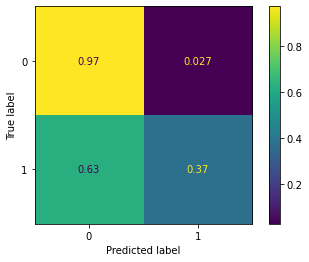

In [18]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

In [19]:
import catboost as cb
from sklearn.model_selection import train_test_split

model = cb.CatBoostClassifier()

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_Train, y_Train)


0:	learn: 0.6687807	test: 0.6688691	best: 0.6688691 (0)	total: 60.1ms	remaining: 5.95s
1:	learn: 0.6461693	test: 0.6463256	best: 0.6463256 (1)	total: 72.7ms	remaining: 3.56s
2:	learn: 0.6257059	test: 0.6260190	best: 0.6260190 (2)	total: 83.7ms	remaining: 2.71s
3:	learn: 0.6073604	test: 0.6078605	best: 0.6078605 (3)	total: 93.2ms	remaining: 2.24s
4:	learn: 0.5902259	test: 0.5908943	best: 0.5908943 (4)	total: 102ms	remaining: 1.94s
5:	learn: 0.5735129	test: 0.5744006	best: 0.5744006 (5)	total: 112ms	remaining: 1.75s
6:	learn: 0.5581551	test: 0.5591222	best: 0.5591222 (6)	total: 125ms	remaining: 1.66s
7:	learn: 0.5431034	test: 0.5440083	best: 0.5440083 (7)	total: 134ms	remaining: 1.54s
8:	learn: 0.5302291	test: 0.5312325	best: 0.5312325 (8)	total: 143ms	remaining: 1.44s
9:	learn: 0.5175106	test: 0.5184560	best: 0.5184560 (9)	total: 149ms	remaining: 1.34s
10:	learn: 0.5066962	test: 0.5077492	best: 0.5077492 (10)	total: 154ms	remaining: 1.25s
11:	learn: 0.4939956	test: 0.4950810	best: 0.495

15:	learn: 0.3410639	test: 0.3391397	best: 0.3391397 (15)	total: 46.9ms	remaining: 246ms
16:	learn: 0.3391033	test: 0.3367415	best: 0.3367415 (16)	total: 50.3ms	remaining: 246ms
17:	learn: 0.3373766	test: 0.3351012	best: 0.3351012 (17)	total: 53.8ms	remaining: 245ms
18:	learn: 0.3357736	test: 0.3334400	best: 0.3334400 (18)	total: 57.9ms	remaining: 247ms
19:	learn: 0.3343032	test: 0.3319334	best: 0.3319334 (19)	total: 61.5ms	remaining: 246ms
20:	learn: 0.3327312	test: 0.3302216	best: 0.3302216 (20)	total: 65.9ms	remaining: 248ms
21:	learn: 0.3314966	test: 0.3287137	best: 0.3287137 (21)	total: 70.2ms	remaining: 249ms
22:	learn: 0.3302962	test: 0.3271336	best: 0.3271336 (22)	total: 74.7ms	remaining: 250ms
23:	learn: 0.3285844	test: 0.3251733	best: 0.3251733 (23)	total: 79.1ms	remaining: 250ms
24:	learn: 0.3276644	test: 0.3240474	best: 0.3240474 (24)	total: 85.5ms	remaining: 257ms
25:	learn: 0.3270324	test: 0.3234075	best: 0.3234075 (25)	total: 89.2ms	remaining: 254ms
26:	learn: 0.3262318	

54:	learn: 0.3422992	test: 0.3400732	best: 0.3400732 (54)	total: 150ms	remaining: 122ms
55:	learn: 0.3412439	test: 0.3389439	best: 0.3389439 (55)	total: 153ms	remaining: 121ms
56:	learn: 0.3404647	test: 0.3381461	best: 0.3381461 (56)	total: 157ms	remaining: 118ms
57:	learn: 0.3397492	test: 0.3373366	best: 0.3373366 (57)	total: 161ms	remaining: 117ms
58:	learn: 0.3391637	test: 0.3366561	best: 0.3366561 (58)	total: 167ms	remaining: 116ms
59:	learn: 0.3385626	test: 0.3359179	best: 0.3359179 (59)	total: 170ms	remaining: 113ms
60:	learn: 0.3379397	test: 0.3352389	best: 0.3352389 (60)	total: 172ms	remaining: 110ms
61:	learn: 0.3372783	test: 0.3346331	best: 0.3346331 (61)	total: 175ms	remaining: 107ms
62:	learn: 0.3367072	test: 0.3339833	best: 0.3339833 (62)	total: 177ms	remaining: 104ms
63:	learn: 0.3359464	test: 0.3331558	best: 0.3331558 (63)	total: 182ms	remaining: 103ms
64:	learn: 0.3354990	test: 0.3325954	best: 0.3325954 (64)	total: 185ms	remaining: 99.8ms
65:	learn: 0.3348789	test: 0.33

92:	learn: 0.2997168	test: 0.2939806	best: 0.2939806 (92)	total: 265ms	remaining: 19.9ms
93:	learn: 0.2994862	test: 0.2937785	best: 0.2937785 (93)	total: 268ms	remaining: 17.1ms
94:	learn: 0.2993051	test: 0.2934714	best: 0.2934714 (94)	total: 272ms	remaining: 14.3ms
95:	learn: 0.2992345	test: 0.2934422	best: 0.2934422 (95)	total: 276ms	remaining: 11.5ms
96:	learn: 0.2990440	test: 0.2932810	best: 0.2932810 (96)	total: 279ms	remaining: 8.63ms
97:	learn: 0.2988936	test: 0.2930151	best: 0.2930151 (97)	total: 283ms	remaining: 5.77ms
98:	learn: 0.2987283	test: 0.2928377	best: 0.2928377 (98)	total: 285ms	remaining: 2.88ms
99:	learn: 0.2986765	test: 0.2927548	best: 0.2927548 (99)	total: 288ms	remaining: 0us

bestTest = 0.2927547541
bestIteration = 99

3:	loss: 0.2927548	best: 0.2922174 (1)	total: 1.41s	remaining: 32.3s
0:	learn: 0.6687807	test: 0.6688691	best: 0.6688691 (0)	total: 2.71ms	remaining: 268ms
1:	learn: 0.6461693	test: 0.6463256	best: 0.6463256 (1)	total: 5.36ms	remaining: 263ms
2:	

9:	learn: 0.3735623	test: 0.3728614	best: 0.3728614 (9)	total: 38.2ms	remaining: 343ms
10:	learn: 0.3654938	test: 0.3642476	best: 0.3642476 (10)	total: 40.9ms	remaining: 331ms
11:	learn: 0.3597316	test: 0.3584145	best: 0.3584145 (11)	total: 43.4ms	remaining: 318ms
12:	learn: 0.3530095	test: 0.3514244	best: 0.3514244 (12)	total: 49.6ms	remaining: 332ms
13:	learn: 0.3485928	test: 0.3467032	best: 0.3467032 (13)	total: 53.1ms	remaining: 326ms
14:	learn: 0.3441491	test: 0.3419895	best: 0.3419895 (14)	total: 57.2ms	remaining: 324ms
15:	learn: 0.3414287	test: 0.3390494	best: 0.3390494 (15)	total: 60.5ms	remaining: 318ms
16:	learn: 0.3393348	test: 0.3368807	best: 0.3368807 (16)	total: 66.6ms	remaining: 325ms
17:	learn: 0.3370594	test: 0.3344405	best: 0.3344405 (17)	total: 69.9ms	remaining: 319ms
18:	learn: 0.3354792	test: 0.3327954	best: 0.3327954 (18)	total: 73.1ms	remaining: 312ms
19:	learn: 0.3341253	test: 0.3313884	best: 0.3313884 (19)	total: 75.7ms	remaining: 303ms
20:	learn: 0.3322051	te

27:	learn: 0.3890600	test: 0.3891685	best: 0.3891685 (27)	total: 84.2ms	remaining: 216ms
28:	learn: 0.3858905	test: 0.3857961	best: 0.3857961 (28)	total: 89.7ms	remaining: 220ms
29:	learn: 0.3827656	test: 0.3825366	best: 0.3825366 (29)	total: 94.5ms	remaining: 221ms
30:	learn: 0.3794478	test: 0.3791105	best: 0.3791105 (30)	total: 97.3ms	remaining: 217ms
31:	learn: 0.3759255	test: 0.3755118	best: 0.3755118 (31)	total: 102ms	remaining: 217ms
32:	learn: 0.3726751	test: 0.3721812	best: 0.3721812 (32)	total: 105ms	remaining: 214ms
33:	learn: 0.3699797	test: 0.3693005	best: 0.3693005 (33)	total: 108ms	remaining: 210ms
34:	learn: 0.3671631	test: 0.3663994	best: 0.3663994 (34)	total: 111ms	remaining: 206ms
35:	learn: 0.3651238	test: 0.3643673	best: 0.3643673 (35)	total: 114ms	remaining: 203ms
36:	learn: 0.3633877	test: 0.3624870	best: 0.3624870 (36)	total: 118ms	remaining: 201ms
37:	learn: 0.3613918	test: 0.3603676	best: 0.3603676 (37)	total: 121ms	remaining: 197ms
38:	learn: 0.3594176	test: 0

62:	learn: 0.3051782	test: 0.2987990	best: 0.2987990 (62)	total: 180ms	remaining: 105ms
63:	learn: 0.3047535	test: 0.2981952	best: 0.2981952 (63)	total: 184ms	remaining: 103ms
64:	learn: 0.3044096	test: 0.2976899	best: 0.2976899 (64)	total: 189ms	remaining: 102ms
65:	learn: 0.3041088	test: 0.2972938	best: 0.2972938 (65)	total: 193ms	remaining: 99.5ms
66:	learn: 0.3039219	test: 0.2970790	best: 0.2970790 (66)	total: 196ms	remaining: 96.5ms
67:	learn: 0.3037686	test: 0.2970216	best: 0.2970216 (67)	total: 200ms	remaining: 93.9ms
68:	learn: 0.3036557	test: 0.2968942	best: 0.2968942 (68)	total: 202ms	remaining: 90.8ms
69:	learn: 0.3033653	test: 0.2964813	best: 0.2964813 (69)	total: 205ms	remaining: 87.7ms
70:	learn: 0.3032449	test: 0.2963405	best: 0.2963405 (70)	total: 207ms	remaining: 84.7ms
71:	learn: 0.3031075	test: 0.2962182	best: 0.2962182 (71)	total: 210ms	remaining: 81.7ms
72:	learn: 0.3030553	test: 0.2962074	best: 0.2962074 (72)	total: 213ms	remaining: 78.7ms
73:	learn: 0.3029458	tes

99:	learn: 0.3212761	test: 0.3168755	best: 0.3168755 (99)	total: 282ms	remaining: 141ms
100:	learn: 0.3210872	test: 0.3166245	best: 0.3166245 (100)	total: 286ms	remaining: 139ms
101:	learn: 0.3208848	test: 0.3164127	best: 0.3164127 (101)	total: 290ms	remaining: 136ms
102:	learn: 0.3207107	test: 0.3162083	best: 0.3162083 (102)	total: 296ms	remaining: 135ms
103:	learn: 0.3204677	test: 0.3159284	best: 0.3159284 (103)	total: 299ms	remaining: 132ms
104:	learn: 0.3200541	test: 0.3154724	best: 0.3154724 (104)	total: 302ms	remaining: 129ms
105:	learn: 0.3198587	test: 0.3153096	best: 0.3153096 (105)	total: 304ms	remaining: 126ms
106:	learn: 0.3196621	test: 0.3150847	best: 0.3150847 (106)	total: 307ms	remaining: 123ms
107:	learn: 0.3194516	test: 0.3148403	best: 0.3148403 (107)	total: 309ms	remaining: 120ms
108:	learn: 0.3193377	test: 0.3147679	best: 0.3147679 (108)	total: 312ms	remaining: 117ms
109:	learn: 0.3191879	test: 0.3146454	best: 0.3146454 (109)	total: 315ms	remaining: 115ms
110:	learn: 

98:	learn: 0.2988775	test: 0.2924256	best: 0.2924256 (98)	total: 279ms	remaining: 144ms
99:	learn: 0.2987674	test: 0.2922174	best: 0.2922174 (99)	total: 285ms	remaining: 143ms
100:	learn: 0.2986893	test: 0.2921549	best: 0.2921549 (100)	total: 288ms	remaining: 140ms
101:	learn: 0.2986319	test: 0.2921166	best: 0.2921166 (101)	total: 290ms	remaining: 137ms
102:	learn: 0.2985400	test: 0.2919354	best: 0.2919354 (102)	total: 294ms	remaining: 134ms
103:	learn: 0.2984471	test: 0.2918977	best: 0.2918977 (103)	total: 296ms	remaining: 131ms
104:	learn: 0.2982929	test: 0.2917746	best: 0.2917746 (104)	total: 299ms	remaining: 128ms
105:	learn: 0.2982156	test: 0.2916147	best: 0.2916147 (105)	total: 302ms	remaining: 125ms
106:	learn: 0.2980698	test: 0.2914803	best: 0.2914803 (106)	total: 304ms	remaining: 122ms
107:	learn: 0.2979504	test: 0.2913690	best: 0.2913690 (107)	total: 307ms	remaining: 120ms
108:	learn: 0.2978304	test: 0.2912650	best: 0.2912650 (108)	total: 310ms	remaining: 117ms
109:	learn: 0.

90:	learn: 0.3256012	test: 0.3216880	best: 0.3216880 (90)	total: 258ms	remaining: 167ms
91:	learn: 0.3253551	test: 0.3214172	best: 0.3214172 (91)	total: 262ms	remaining: 165ms
92:	learn: 0.3251660	test: 0.3211401	best: 0.3211401 (92)	total: 266ms	remaining: 163ms
93:	learn: 0.3246298	test: 0.3205441	best: 0.3205441 (93)	total: 272ms	remaining: 162ms
94:	learn: 0.3241949	test: 0.3200208	best: 0.3200208 (94)	total: 276ms	remaining: 160ms
95:	learn: 0.3240293	test: 0.3197734	best: 0.3197734 (95)	total: 278ms	remaining: 156ms
96:	learn: 0.3238525	test: 0.3195286	best: 0.3195286 (96)	total: 282ms	remaining: 154ms
97:	learn: 0.3235733	test: 0.3192962	best: 0.3192962 (97)	total: 285ms	remaining: 151ms
98:	learn: 0.3233968	test: 0.3191144	best: 0.3191144 (98)	total: 287ms	remaining: 148ms
99:	learn: 0.3231965	test: 0.3188927	best: 0.3188927 (99)	total: 290ms	remaining: 145ms
100:	learn: 0.3230530	test: 0.3186724	best: 0.3186724 (100)	total: 293ms	remaining: 142ms
101:	learn: 0.3228831	test: 0.

78:	learn: 0.3021494	test: 0.2960868	best: 0.2960868 (78)	total: 234ms	remaining: 210ms
79:	learn: 0.3017574	test: 0.2956826	best: 0.2956826 (79)	total: 237ms	remaining: 208ms
80:	learn: 0.3016226	test: 0.2955199	best: 0.2955199 (80)	total: 241ms	remaining: 205ms
81:	learn: 0.3013092	test: 0.2952048	best: 0.2952048 (81)	total: 245ms	remaining: 203ms
82:	learn: 0.3012011	test: 0.2951431	best: 0.2951431 (82)	total: 247ms	remaining: 199ms
83:	learn: 0.3010112	test: 0.2949683	best: 0.2949683 (83)	total: 250ms	remaining: 196ms
84:	learn: 0.3009027	test: 0.2949702	best: 0.2949683 (83)	total: 252ms	remaining: 193ms
85:	learn: 0.3006233	test: 0.2947154	best: 0.2947154 (85)	total: 255ms	remaining: 189ms
86:	learn: 0.3005200	test: 0.2946890	best: 0.2946890 (86)	total: 258ms	remaining: 187ms
87:	learn: 0.3003006	test: 0.2943305	best: 0.2943305 (87)	total: 260ms	remaining: 183ms
88:	learn: 0.3001740	test: 0.2942626	best: 0.2942626 (88)	total: 263ms	remaining: 180ms
89:	learn: 0.3000418	test: 0.294

71:	learn: 0.3316805	test: 0.3285885	best: 0.3285885 (71)	total: 220ms	remaining: 238ms
72:	learn: 0.3309984	test: 0.3277737	best: 0.3277737 (72)	total: 223ms	remaining: 236ms
73:	learn: 0.3304880	test: 0.3272043	best: 0.3272043 (73)	total: 227ms	remaining: 233ms
74:	learn: 0.3302072	test: 0.3268601	best: 0.3268601 (74)	total: 231ms	remaining: 231ms
75:	learn: 0.3298919	test: 0.3265179	best: 0.3265179 (75)	total: 235ms	remaining: 228ms
76:	learn: 0.3295702	test: 0.3261516	best: 0.3261516 (76)	total: 239ms	remaining: 227ms
77:	learn: 0.3292838	test: 0.3258502	best: 0.3258502 (77)	total: 242ms	remaining: 223ms
78:	learn: 0.3289726	test: 0.3254723	best: 0.3254723 (78)	total: 244ms	remaining: 219ms
79:	learn: 0.3287262	test: 0.3251677	best: 0.3251677 (79)	total: 247ms	remaining: 216ms
80:	learn: 0.3283071	test: 0.3246952	best: 0.3246952 (80)	total: 251ms	remaining: 213ms
81:	learn: 0.3280815	test: 0.3244144	best: 0.3244144 (81)	total: 253ms	remaining: 210ms
82:	learn: 0.3277720	test: 0.324

60:	learn: 0.3057235	test: 0.2994135	best: 0.2994135 (60)	total: 169ms	remaining: 247ms
61:	learn: 0.3055037	test: 0.2992545	best: 0.2992545 (61)	total: 173ms	remaining: 245ms
62:	learn: 0.3052875	test: 0.2990149	best: 0.2990149 (62)	total: 177ms	remaining: 244ms
63:	learn: 0.3051595	test: 0.2988892	best: 0.2988892 (63)	total: 181ms	remaining: 244ms
64:	learn: 0.3047766	test: 0.2984923	best: 0.2984923 (64)	total: 185ms	remaining: 241ms
65:	learn: 0.3046871	test: 0.2984408	best: 0.2984408 (65)	total: 187ms	remaining: 238ms
66:	learn: 0.3045304	test: 0.2982797	best: 0.2982797 (66)	total: 190ms	remaining: 235ms
67:	learn: 0.3043850	test: 0.2979937	best: 0.2979937 (67)	total: 192ms	remaining: 232ms
68:	learn: 0.3042284	test: 0.2977397	best: 0.2977397 (68)	total: 195ms	remaining: 229ms
69:	learn: 0.3039150	test: 0.2972031	best: 0.2972031 (69)	total: 197ms	remaining: 225ms
70:	learn: 0.3037612	test: 0.2971050	best: 0.2971050 (70)	total: 200ms	remaining: 222ms
71:	learn: 0.3036861	test: 0.297

52:	learn: 0.3414200	test: 0.3393531	best: 0.3393531 (52)	total: 155ms	remaining: 284ms
53:	learn: 0.3406051	test: 0.3384690	best: 0.3384690 (53)	total: 159ms	remaining: 282ms
54:	learn: 0.3398198	test: 0.3375928	best: 0.3375928 (54)	total: 162ms	remaining: 280ms
55:	learn: 0.3391097	test: 0.3368492	best: 0.3368492 (55)	total: 168ms	remaining: 282ms
56:	learn: 0.3385012	test: 0.3362887	best: 0.3362887 (56)	total: 171ms	remaining: 279ms
57:	learn: 0.3378046	test: 0.3355674	best: 0.3355674 (57)	total: 174ms	remaining: 276ms
58:	learn: 0.3371552	test: 0.3348388	best: 0.3348388 (58)	total: 176ms	remaining: 272ms
59:	learn: 0.3365145	test: 0.3340734	best: 0.3340734 (59)	total: 180ms	remaining: 269ms
60:	learn: 0.3359262	test: 0.3333457	best: 0.3333457 (60)	total: 183ms	remaining: 267ms
61:	learn: 0.3351407	test: 0.3324539	best: 0.3324539 (61)	total: 186ms	remaining: 264ms
62:	learn: 0.3346068	test: 0.3317856	best: 0.3317856 (62)	total: 189ms	remaining: 261ms
63:	learn: 0.3341772	test: 0.331

37:	learn: 0.3161156	test: 0.3109319	best: 0.3109319 (37)	total: 112ms	remaining: 330ms
38:	learn: 0.3158445	test: 0.3106076	best: 0.3106076 (38)	total: 117ms	remaining: 334ms
39:	learn: 0.3147687	test: 0.3094125	best: 0.3094125 (39)	total: 121ms	remaining: 334ms
40:	learn: 0.3144237	test: 0.3088897	best: 0.3088897 (40)	total: 125ms	remaining: 332ms
41:	learn: 0.3141967	test: 0.3086250	best: 0.3086250 (41)	total: 131ms	remaining: 336ms
42:	learn: 0.3132197	test: 0.3074026	best: 0.3074026 (42)	total: 134ms	remaining: 334ms
43:	learn: 0.3128375	test: 0.3070937	best: 0.3070937 (43)	total: 137ms	remaining: 329ms
44:	learn: 0.3120577	test: 0.3060923	best: 0.3060923 (44)	total: 140ms	remaining: 326ms
45:	learn: 0.3117066	test: 0.3058795	best: 0.3058795 (45)	total: 143ms	remaining: 323ms
46:	learn: 0.3113350	test: 0.3056536	best: 0.3056536 (46)	total: 145ms	remaining: 319ms
47:	learn: 0.3109635	test: 0.3051176	best: 0.3051176 (47)	total: 148ms	remaining: 315ms
48:	learn: 0.3107155	test: 0.304

24:	learn: 0.4026065	test: 0.4031871	best: 0.4031871 (24)	total: 71ms	remaining: 497ms
25:	learn: 0.3987214	test: 0.3992915	best: 0.3992915 (25)	total: 74.9ms	remaining: 501ms
26:	learn: 0.3939745	test: 0.3944789	best: 0.3944789 (26)	total: 81.4ms	remaining: 522ms
27:	learn: 0.3903146	test: 0.3909134	best: 0.3909134 (27)	total: 84.9ms	remaining: 521ms
28:	learn: 0.3866147	test: 0.3870199	best: 0.3870199 (28)	total: 87.7ms	remaining: 517ms
29:	learn: 0.3827435	test: 0.3830718	best: 0.3830718 (29)	total: 90.6ms	remaining: 514ms
30:	learn: 0.3791772	test: 0.3794231	best: 0.3794231 (30)	total: 93.8ms	remaining: 511ms
31:	learn: 0.3767325	test: 0.3768112	best: 0.3768112 (31)	total: 96.7ms	remaining: 507ms
32:	learn: 0.3742909	test: 0.3743481	best: 0.3743481 (32)	total: 99.3ms	remaining: 502ms
33:	learn: 0.3720147	test: 0.3720514	best: 0.3720514 (33)	total: 102ms	remaining: 498ms
34:	learn: 0.3694797	test: 0.3693322	best: 0.3693322 (34)	total: 105ms	remaining: 493ms
35:	learn: 0.3673237	test

166:	learn: 0.3097922	test: 0.3041570	best: 0.3041570 (166)	total: 477ms	remaining: 94.3ms
167:	learn: 0.3096943	test: 0.3040337	best: 0.3040337 (167)	total: 481ms	remaining: 91.6ms
168:	learn: 0.3094600	test: 0.3037891	best: 0.3037891 (168)	total: 485ms	remaining: 88.9ms
169:	learn: 0.3093788	test: 0.3037341	best: 0.3037341 (169)	total: 489ms	remaining: 86.2ms
170:	learn: 0.3093167	test: 0.3036692	best: 0.3036692 (170)	total: 493ms	remaining: 83.6ms
171:	learn: 0.3092528	test: 0.3036011	best: 0.3036011 (171)	total: 496ms	remaining: 80.7ms
172:	learn: 0.3091930	test: 0.3035370	best: 0.3035370 (172)	total: 500ms	remaining: 78.1ms
173:	learn: 0.3090820	test: 0.3034541	best: 0.3034541 (173)	total: 503ms	remaining: 75.2ms
174:	learn: 0.3088962	test: 0.3032101	best: 0.3032101 (174)	total: 506ms	remaining: 72.3ms
175:	learn: 0.3086786	test: 0.3029850	best: 0.3029850 (175)	total: 509ms	remaining: 69.4ms
176:	learn: 0.3085881	test: 0.3029155	best: 0.3029155 (176)	total: 511ms	remaining: 66.4ms

107:	learn: 0.2979504	test: 0.2913690	best: 0.2913690 (107)	total: 301ms	remaining: 257ms
108:	learn: 0.2978304	test: 0.2912650	best: 0.2912650 (108)	total: 305ms	remaining: 254ms
109:	learn: 0.2977314	test: 0.2911365	best: 0.2911365 (109)	total: 308ms	remaining: 252ms
110:	learn: 0.2976676	test: 0.2909959	best: 0.2909959 (110)	total: 313ms	remaining: 251ms
111:	learn: 0.2976107	test: 0.2909338	best: 0.2909338 (111)	total: 318ms	remaining: 250ms
112:	learn: 0.2975248	test: 0.2909178	best: 0.2909178 (112)	total: 320ms	remaining: 247ms
113:	learn: 0.2974731	test: 0.2908586	best: 0.2908586 (113)	total: 323ms	remaining: 244ms
114:	learn: 0.2973625	test: 0.2907792	best: 0.2907792 (114)	total: 326ms	remaining: 241ms
115:	learn: 0.2973152	test: 0.2907547	best: 0.2907547 (115)	total: 329ms	remaining: 238ms
116:	learn: 0.2972126	test: 0.2906573	best: 0.2906573 (116)	total: 332ms	remaining: 235ms
117:	learn: 0.2971202	test: 0.2905954	best: 0.2905954 (117)	total: 336ms	remaining: 233ms
118:	learn

48:	learn: 0.3477213	test: 0.3459591	best: 0.3459591 (48)	total: 141ms	remaining: 436ms
49:	learn: 0.3468585	test: 0.3449409	best: 0.3449409 (49)	total: 146ms	remaining: 437ms
50:	learn: 0.3455232	test: 0.3435292	best: 0.3435292 (50)	total: 151ms	remaining: 442ms
51:	learn: 0.3447788	test: 0.3427071	best: 0.3427071 (51)	total: 155ms	remaining: 442ms
52:	learn: 0.3439672	test: 0.3419026	best: 0.3419026 (52)	total: 158ms	remaining: 439ms
53:	learn: 0.3431079	test: 0.3409744	best: 0.3409744 (53)	total: 161ms	remaining: 435ms
54:	learn: 0.3422992	test: 0.3400732	best: 0.3400732 (54)	total: 163ms	remaining: 431ms
55:	learn: 0.3412439	test: 0.3389439	best: 0.3389439 (55)	total: 166ms	remaining: 427ms
56:	learn: 0.3404647	test: 0.3381461	best: 0.3381461 (56)	total: 169ms	remaining: 424ms
57:	learn: 0.3397492	test: 0.3373366	best: 0.3373366 (57)	total: 172ms	remaining: 420ms
58:	learn: 0.3391637	test: 0.3366561	best: 0.3366561 (58)	total: 174ms	remaining: 416ms
59:	learn: 0.3385626	test: 0.335

192:	learn: 0.3068386	test: 0.3002916	best: 0.3002916 (192)	total: 545ms	remaining: 19.7ms
193:	learn: 0.3066713	test: 0.3000909	best: 0.3000909 (193)	total: 548ms	remaining: 17ms
194:	learn: 0.3066371	test: 0.3000856	best: 0.3000856 (194)	total: 552ms	remaining: 14.1ms
195:	learn: 0.3065010	test: 0.2999017	best: 0.2999017 (195)	total: 555ms	remaining: 11.3ms
196:	learn: 0.3064255	test: 0.2998178	best: 0.2998178 (196)	total: 558ms	remaining: 8.5ms
197:	learn: 0.3063571	test: 0.2997856	best: 0.2997856 (197)	total: 563ms	remaining: 5.69ms
198:	learn: 0.3062899	test: 0.2997126	best: 0.2997126 (198)	total: 566ms	remaining: 2.85ms
199:	learn: 0.3061767	test: 0.2995487	best: 0.2995487 (199)	total: 570ms	remaining: 0us

bestTest = 0.2995487191
bestIteration = 199

18:	loss: 0.2995487	best: 0.2871815 (17)	total: 8.02s	remaining: 32.5s
0:	learn: 0.6161059	test: 0.6163087	best: 0.6163087 (0)	total: 4.77ms	remaining: 949ms
1:	learn: 0.5509722	test: 0.5515306	best: 0.5515306 (1)	total: 7.86ms	rema

138:	learn: 0.2954720	test: 0.2892392	best: 0.2892392 (138)	total: 387ms	remaining: 170ms
139:	learn: 0.2954437	test: 0.2891568	best: 0.2891568 (139)	total: 390ms	remaining: 167ms
140:	learn: 0.2953783	test: 0.2890681	best: 0.2890681 (140)	total: 396ms	remaining: 166ms
141:	learn: 0.2953028	test: 0.2889943	best: 0.2889943 (141)	total: 399ms	remaining: 163ms
142:	learn: 0.2952658	test: 0.2889584	best: 0.2889584 (142)	total: 402ms	remaining: 160ms
143:	learn: 0.2952212	test: 0.2888954	best: 0.2888954 (143)	total: 405ms	remaining: 157ms
144:	learn: 0.2951770	test: 0.2888746	best: 0.2888746 (144)	total: 407ms	remaining: 154ms
145:	learn: 0.2950596	test: 0.2887039	best: 0.2887039 (145)	total: 411ms	remaining: 152ms
146:	learn: 0.2948265	test: 0.2885174	best: 0.2885174 (146)	total: 414ms	remaining: 149ms
147:	learn: 0.2947812	test: 0.2885636	best: 0.2885174 (146)	total: 416ms	remaining: 146ms
148:	learn: 0.2947338	test: 0.2885598	best: 0.2885174 (146)	total: 419ms	remaining: 143ms
149:	learn

75:	learn: 0.3298919	test: 0.3265179	best: 0.3265179 (75)	total: 229ms	remaining: 373ms
76:	learn: 0.3295702	test: 0.3261516	best: 0.3261516 (76)	total: 233ms	remaining: 372ms
77:	learn: 0.3292838	test: 0.3258502	best: 0.3258502 (77)	total: 237ms	remaining: 371ms
78:	learn: 0.3289726	test: 0.3254723	best: 0.3254723 (78)	total: 242ms	remaining: 371ms
79:	learn: 0.3287262	test: 0.3251677	best: 0.3251677 (79)	total: 246ms	remaining: 369ms
80:	learn: 0.3283071	test: 0.3246952	best: 0.3246952 (80)	total: 250ms	remaining: 367ms
81:	learn: 0.3280815	test: 0.3244144	best: 0.3244144 (81)	total: 252ms	remaining: 363ms
82:	learn: 0.3277720	test: 0.3241048	best: 0.3241048 (82)	total: 255ms	remaining: 359ms
83:	learn: 0.3274624	test: 0.3237505	best: 0.3237505 (83)	total: 258ms	remaining: 356ms
84:	learn: 0.3271168	test: 0.3234147	best: 0.3234147 (84)	total: 261ms	remaining: 352ms
85:	learn: 0.3268599	test: 0.3231844	best: 0.3231844 (85)	total: 263ms	remaining: 349ms
86:	learn: 0.3265943	test: 0.322

8:	learn: 0.3814184	test: 0.3812474	best: 0.3812474 (8)	total: 25.2ms	remaining: 535ms
9:	learn: 0.3735623	test: 0.3728614	best: 0.3728614 (9)	total: 28.9ms	remaining: 550ms
10:	learn: 0.3654938	test: 0.3642476	best: 0.3642476 (10)	total: 32.5ms	remaining: 558ms
11:	learn: 0.3597316	test: 0.3584145	best: 0.3584145 (11)	total: 36ms	remaining: 565ms
12:	learn: 0.3530095	test: 0.3514244	best: 0.3514244 (12)	total: 40.3ms	remaining: 579ms
13:	learn: 0.3485928	test: 0.3467032	best: 0.3467032 (13)	total: 44.7ms	remaining: 594ms
14:	learn: 0.3441491	test: 0.3419895	best: 0.3419895 (14)	total: 47.5ms	remaining: 585ms
15:	learn: 0.3414287	test: 0.3390494	best: 0.3390494 (15)	total: 50.1ms	remaining: 576ms
16:	learn: 0.3393348	test: 0.3368807	best: 0.3368807 (16)	total: 53ms	remaining: 570ms
17:	learn: 0.3370594	test: 0.3344405	best: 0.3344405 (17)	total: 55.7ms	remaining: 563ms
18:	learn: 0.3354792	test: 0.3327954	best: 0.3327954 (18)	total: 59.3ms	remaining: 565ms
19:	learn: 0.3341253	test: 0.

151:	learn: 0.2951866	test: 0.2885532	best: 0.2885532 (151)	total: 427ms	remaining: 135ms
152:	learn: 0.2951393	test: 0.2885427	best: 0.2885427 (152)	total: 430ms	remaining: 132ms
153:	learn: 0.2950859	test: 0.2884641	best: 0.2884641 (153)	total: 434ms	remaining: 130ms
154:	learn: 0.2950202	test: 0.2883998	best: 0.2883998 (154)	total: 437ms	remaining: 127ms
155:	learn: 0.2949718	test: 0.2883561	best: 0.2883561 (155)	total: 443ms	remaining: 125ms
156:	learn: 0.2949461	test: 0.2882783	best: 0.2882783 (156)	total: 446ms	remaining: 122ms
157:	learn: 0.2949194	test: 0.2882545	best: 0.2882545 (157)	total: 449ms	remaining: 119ms
158:	learn: 0.2948918	test: 0.2882732	best: 0.2882545 (157)	total: 451ms	remaining: 116ms
159:	learn: 0.2948375	test: 0.2882711	best: 0.2882545 (157)	total: 454ms	remaining: 114ms
160:	learn: 0.2947816	test: 0.2883288	best: 0.2882545 (157)	total: 457ms	remaining: 111ms
161:	learn: 0.2945857	test: 0.2881725	best: 0.2881725 (161)	total: 460ms	remaining: 108ms
162:	learn

92:	learn: 0.3228610	test: 0.3184708	best: 0.3184708 (92)	total: 273ms	remaining: 314ms
93:	learn: 0.3223823	test: 0.3178772	best: 0.3178772 (93)	total: 277ms	remaining: 312ms
94:	learn: 0.3221676	test: 0.3176950	best: 0.3176950 (94)	total: 281ms	remaining: 310ms
95:	learn: 0.3218553	test: 0.3174426	best: 0.3174426 (95)	total: 285ms	remaining: 308ms
96:	learn: 0.3215609	test: 0.3171116	best: 0.3171116 (96)	total: 290ms	remaining: 308ms
97:	learn: 0.3212298	test: 0.3167906	best: 0.3167906 (97)	total: 294ms	remaining: 306ms
98:	learn: 0.3208212	test: 0.3162957	best: 0.3162957 (98)	total: 297ms	remaining: 303ms
99:	learn: 0.3206573	test: 0.3161286	best: 0.3161286 (99)	total: 300ms	remaining: 300ms
100:	learn: 0.3204545	test: 0.3158610	best: 0.3158610 (100)	total: 302ms	remaining: 296ms
101:	learn: 0.3202685	test: 0.3157072	best: 0.3157072 (101)	total: 305ms	remaining: 293ms
102:	learn: 0.3201263	test: 0.3154921	best: 0.3154921 (102)	total: 308ms	remaining: 290ms
103:	learn: 0.3199655	test

30:	learn: 0.3219796	test: 0.3178387	best: 0.3178387 (30)	total: 85.3ms	remaining: 465ms
31:	learn: 0.3206076	test: 0.3161179	best: 0.3161179 (31)	total: 88.9ms	remaining: 467ms
32:	learn: 0.3190531	test: 0.3144053	best: 0.3144053 (32)	total: 91.9ms	remaining: 465ms
33:	learn: 0.3185381	test: 0.3137720	best: 0.3137720 (33)	total: 95.6ms	remaining: 467ms
34:	learn: 0.3180888	test: 0.3133342	best: 0.3133342 (34)	total: 101ms	remaining: 475ms
35:	learn: 0.3170428	test: 0.3119767	best: 0.3119767 (35)	total: 106ms	remaining: 482ms
36:	learn: 0.3166540	test: 0.3115407	best: 0.3115407 (36)	total: 109ms	remaining: 482ms
37:	learn: 0.3161156	test: 0.3109319	best: 0.3109319 (37)	total: 113ms	remaining: 483ms
38:	learn: 0.3158445	test: 0.3106076	best: 0.3106076 (38)	total: 117ms	remaining: 481ms
39:	learn: 0.3147687	test: 0.3094125	best: 0.3094125 (39)	total: 120ms	remaining: 480ms
40:	learn: 0.3144237	test: 0.3088897	best: 0.3088897 (40)	total: 123ms	remaining: 479ms
41:	learn: 0.3141967	test: 0

167:	learn: 0.2938585	test: 0.2873548	best: 0.2872979 (166)	total: 480ms	remaining: 91.5ms
168:	learn: 0.2938109	test: 0.2873243	best: 0.2872979 (166)	total: 484ms	remaining: 88.8ms
169:	learn: 0.2937202	test: 0.2873205	best: 0.2872979 (166)	total: 488ms	remaining: 86ms
170:	learn: 0.2936811	test: 0.2872633	best: 0.2872633 (170)	total: 491ms	remaining: 83.3ms
171:	learn: 0.2936591	test: 0.2872835	best: 0.2872633 (170)	total: 495ms	remaining: 80.6ms
172:	learn: 0.2936160	test: 0.2872145	best: 0.2872145 (172)	total: 499ms	remaining: 77.8ms
173:	learn: 0.2935828	test: 0.2872221	best: 0.2872145 (172)	total: 502ms	remaining: 75ms
174:	learn: 0.2935303	test: 0.2871691	best: 0.2871691 (174)	total: 505ms	remaining: 72.1ms
175:	learn: 0.2934970	test: 0.2871725	best: 0.2871691 (174)	total: 508ms	remaining: 69.2ms
176:	learn: 0.2934741	test: 0.2870995	best: 0.2870995 (176)	total: 511ms	remaining: 66.4ms
177:	learn: 0.2934373	test: 0.2870395	best: 0.2870395 (177)	total: 514ms	remaining: 63.5ms
178

86:	learn: 0.3064963	test: 0.3020944	best: 0.3020944 (86)	total: 303ms	remaining: 45.2ms
87:	learn: 0.3062519	test: 0.3018359	best: 0.3018359 (87)	total: 308ms	remaining: 42ms
88:	learn: 0.3060748	test: 0.3016923	best: 0.3016923 (88)	total: 313ms	remaining: 38.7ms
89:	learn: 0.3058682	test: 0.3014697	best: 0.3014697 (89)	total: 318ms	remaining: 35.4ms
90:	learn: 0.3055437	test: 0.3010923	best: 0.3010923 (90)	total: 322ms	remaining: 31.9ms
91:	learn: 0.3051595	test: 0.3006686	best: 0.3006686 (91)	total: 325ms	remaining: 28.3ms
92:	learn: 0.3047613	test: 0.3002119	best: 0.3002119 (92)	total: 329ms	remaining: 24.7ms
93:	learn: 0.3045492	test: 0.2999921	best: 0.2999921 (93)	total: 332ms	remaining: 21.2ms
94:	learn: 0.3043558	test: 0.2997185	best: 0.2997185 (94)	total: 336ms	remaining: 17.7ms
95:	learn: 0.3041739	test: 0.2994853	best: 0.2994853 (95)	total: 340ms	remaining: 14.2ms
96:	learn: 0.3038301	test: 0.2990699	best: 0.2990699 (96)	total: 343ms	remaining: 10.6ms
97:	learn: 0.3035338	te

2:	learn: 0.6236330	test: 0.6240953	best: 0.6240953 (2)	total: 14.9ms	remaining: 481ms
3:	learn: 0.6016089	test: 0.6021599	best: 0.6021599 (3)	total: 19.7ms	remaining: 472ms
4:	learn: 0.5835160	test: 0.5839916	best: 0.5839916 (4)	total: 24.5ms	remaining: 466ms
5:	learn: 0.5646097	test: 0.5650060	best: 0.5650060 (5)	total: 27.6ms	remaining: 432ms
6:	learn: 0.5483470	test: 0.5487558	best: 0.5487558 (6)	total: 30.9ms	remaining: 410ms
7:	learn: 0.5325644	test: 0.5329236	best: 0.5329236 (7)	total: 35.5ms	remaining: 408ms
8:	learn: 0.5177758	test: 0.5182346	best: 0.5182346 (8)	total: 39.3ms	remaining: 397ms
9:	learn: 0.5048146	test: 0.5051787	best: 0.5051787 (9)	total: 42.4ms	remaining: 382ms
10:	learn: 0.4921767	test: 0.4926009	best: 0.4926009 (10)	total: 45.5ms	remaining: 369ms
11:	learn: 0.4812911	test: 0.4816705	best: 0.4816705 (11)	total: 50ms	remaining: 366ms
12:	learn: 0.4704874	test: 0.4708172	best: 0.4708172 (12)	total: 53ms	remaining: 355ms
13:	learn: 0.4610947	test: 0.4613776	best

17:	learn: 0.3208304	test: 0.3173291	best: 0.3173291 (17)	total: 58.8ms	remaining: 268ms
18:	learn: 0.3187894	test: 0.3149362	best: 0.3149362 (18)	total: 65.5ms	remaining: 279ms
19:	learn: 0.3162584	test: 0.3124534	best: 0.3124534 (19)	total: 70.5ms	remaining: 282ms
20:	learn: 0.3144953	test: 0.3103934	best: 0.3103934 (20)	total: 75.4ms	remaining: 284ms
21:	learn: 0.3131141	test: 0.3088308	best: 0.3088308 (21)	total: 79.2ms	remaining: 281ms
22:	learn: 0.3118210	test: 0.3075110	best: 0.3075110 (22)	total: 82.5ms	remaining: 276ms
23:	learn: 0.3105516	test: 0.3062902	best: 0.3062902 (23)	total: 85.6ms	remaining: 271ms
24:	learn: 0.3094055	test: 0.3053565	best: 0.3053565 (24)	total: 89.5ms	remaining: 268ms
25:	learn: 0.3079422	test: 0.3035333	best: 0.3035333 (25)	total: 93.6ms	remaining: 266ms
26:	learn: 0.3068149	test: 0.3023702	best: 0.3023702 (26)	total: 96.9ms	remaining: 262ms
27:	learn: 0.3059581	test: 0.3015069	best: 0.3015069 (27)	total: 100ms	remaining: 258ms
28:	learn: 0.3054286	t

32:	learn: 0.3581498	test: 0.3568470	best: 0.3568470 (32)	total: 118ms	remaining: 240ms
33:	learn: 0.3557184	test: 0.3543891	best: 0.3543891 (33)	total: 123ms	remaining: 239ms
34:	learn: 0.3530918	test: 0.3516580	best: 0.3516580 (34)	total: 131ms	remaining: 243ms
35:	learn: 0.3511026	test: 0.3496000	best: 0.3496000 (35)	total: 135ms	remaining: 240ms
36:	learn: 0.3490999	test: 0.3474943	best: 0.3474943 (36)	total: 138ms	remaining: 235ms
37:	learn: 0.3470464	test: 0.3453814	best: 0.3453814 (37)	total: 141ms	remaining: 230ms
38:	learn: 0.3454041	test: 0.3437729	best: 0.3437729 (38)	total: 145ms	remaining: 227ms
39:	learn: 0.3432232	test: 0.3415136	best: 0.3415136 (39)	total: 149ms	remaining: 223ms
40:	learn: 0.3409195	test: 0.3390166	best: 0.3390166 (40)	total: 152ms	remaining: 219ms
41:	learn: 0.3387908	test: 0.3366901	best: 0.3366901 (41)	total: 156ms	remaining: 215ms
42:	learn: 0.3372056	test: 0.3350555	best: 0.3350555 (42)	total: 159ms	remaining: 211ms
43:	learn: 0.3358131	test: 0.333

42:	learn: 0.2961142	test: 0.2906931	best: 0.2906931 (42)	total: 149ms	remaining: 197ms
43:	learn: 0.2954674	test: 0.2899347	best: 0.2899347 (43)	total: 153ms	remaining: 195ms
44:	learn: 0.2949082	test: 0.2892540	best: 0.2892540 (44)	total: 161ms	remaining: 197ms
45:	learn: 0.2944763	test: 0.2887612	best: 0.2887612 (45)	total: 165ms	remaining: 194ms
46:	learn: 0.2942165	test: 0.2884726	best: 0.2884726 (46)	total: 168ms	remaining: 189ms
47:	learn: 0.2940037	test: 0.2882352	best: 0.2882352 (47)	total: 171ms	remaining: 186ms
48:	learn: 0.2937834	test: 0.2881353	best: 0.2881353 (48)	total: 175ms	remaining: 182ms
49:	learn: 0.2936080	test: 0.2879701	best: 0.2879701 (49)	total: 179ms	remaining: 179ms
50:	learn: 0.2934442	test: 0.2878885	best: 0.2878885 (50)	total: 182ms	remaining: 175ms
51:	learn: 0.2933050	test: 0.2878874	best: 0.2878874 (51)	total: 186ms	remaining: 171ms
52:	learn: 0.2929732	test: 0.2875455	best: 0.2875455 (52)	total: 189ms	remaining: 168ms
53:	learn: 0.2928171	test: 0.287

58:	learn: 0.3184687	test: 0.3146178	best: 0.3146178 (58)	total: 220ms	remaining: 153ms
59:	learn: 0.3179652	test: 0.3140331	best: 0.3140331 (59)	total: 226ms	remaining: 150ms
60:	learn: 0.3172960	test: 0.3133160	best: 0.3133160 (60)	total: 232ms	remaining: 148ms
61:	learn: 0.3165949	test: 0.3126437	best: 0.3126437 (61)	total: 236ms	remaining: 144ms
62:	learn: 0.3158892	test: 0.3117995	best: 0.3117995 (62)	total: 240ms	remaining: 141ms
63:	learn: 0.3151951	test: 0.3110729	best: 0.3110729 (63)	total: 244ms	remaining: 137ms
64:	learn: 0.3144665	test: 0.3102385	best: 0.3102385 (64)	total: 247ms	remaining: 133ms
65:	learn: 0.3139371	test: 0.3097251	best: 0.3097251 (65)	total: 251ms	remaining: 129ms
66:	learn: 0.3133203	test: 0.3090473	best: 0.3090473 (66)	total: 254ms	remaining: 125ms
67:	learn: 0.3128802	test: 0.3085805	best: 0.3085805 (67)	total: 258ms	remaining: 121ms
68:	learn: 0.3124485	test: 0.3081632	best: 0.3081632 (68)	total: 261ms	remaining: 117ms
69:	learn: 0.3118795	test: 0.307

66:	learn: 0.2911165	test: 0.2859536	best: 0.2859536 (66)	total: 250ms	remaining: 123ms
67:	learn: 0.2909084	test: 0.2858140	best: 0.2858140 (67)	total: 254ms	remaining: 119ms
68:	learn: 0.2905353	test: 0.2853629	best: 0.2853629 (68)	total: 260ms	remaining: 117ms
69:	learn: 0.2904054	test: 0.2853029	best: 0.2853029 (69)	total: 265ms	remaining: 113ms
70:	learn: 0.2903098	test: 0.2852451	best: 0.2852451 (70)	total: 269ms	remaining: 110ms
71:	learn: 0.2901604	test: 0.2850943	best: 0.2850943 (71)	total: 274ms	remaining: 106ms
72:	learn: 0.2899678	test: 0.2849755	best: 0.2849755 (72)	total: 279ms	remaining: 103ms
73:	learn: 0.2897386	test: 0.2847184	best: 0.2847184 (73)	total: 284ms	remaining: 99.7ms
74:	learn: 0.2895420	test: 0.2845458	best: 0.2845458 (74)	total: 287ms	remaining: 95.8ms
75:	learn: 0.2894115	test: 0.2844251	best: 0.2844251 (75)	total: 291ms	remaining: 91.8ms
76:	learn: 0.2891946	test: 0.2843633	best: 0.2843633 (76)	total: 294ms	remaining: 87.8ms
77:	learn: 0.2890508	test: 0

76:	learn: 0.3098336	test: 0.3057325	best: 0.3057325 (76)	total: 268ms	remaining: 254ms
77:	learn: 0.3095203	test: 0.3054366	best: 0.3054366 (77)	total: 274ms	remaining: 253ms
78:	learn: 0.3091291	test: 0.3050413	best: 0.3050413 (78)	total: 279ms	remaining: 251ms
79:	learn: 0.3089422	test: 0.3048810	best: 0.3048810 (79)	total: 283ms	remaining: 248ms
80:	learn: 0.3083798	test: 0.3042185	best: 0.3042185 (80)	total: 287ms	remaining: 245ms
81:	learn: 0.3081291	test: 0.3039659	best: 0.3039659 (81)	total: 292ms	remaining: 242ms
82:	learn: 0.3078186	test: 0.3036635	best: 0.3036635 (82)	total: 295ms	remaining: 238ms
83:	learn: 0.3074258	test: 0.3031968	best: 0.3031968 (83)	total: 298ms	remaining: 234ms
84:	learn: 0.3071163	test: 0.3028813	best: 0.3028813 (84)	total: 302ms	remaining: 231ms
85:	learn: 0.3068623	test: 0.3025530	best: 0.3025530 (85)	total: 305ms	remaining: 227ms
86:	learn: 0.3064963	test: 0.3020944	best: 0.3020944 (86)	total: 308ms	remaining: 223ms
87:	learn: 0.3062519	test: 0.301

42:	learn: 0.2973153	test: 0.2924723	best: 0.2924723 (42)	total: 147ms	remaining: 367ms
43:	learn: 0.2971320	test: 0.2924422	best: 0.2924422 (43)	total: 153ms	remaining: 367ms
44:	learn: 0.2968502	test: 0.2922561	best: 0.2922561 (44)	total: 156ms	remaining: 365ms
45:	learn: 0.2964624	test: 0.2920000	best: 0.2920000 (45)	total: 159ms	remaining: 360ms
46:	learn: 0.2956687	test: 0.2910837	best: 0.2910837 (46)	total: 163ms	remaining: 356ms
47:	learn: 0.2954148	test: 0.2908547	best: 0.2908547 (47)	total: 166ms	remaining: 352ms
48:	learn: 0.2951250	test: 0.2905626	best: 0.2905626 (48)	total: 169ms	remaining: 348ms
49:	learn: 0.2945730	test: 0.2899493	best: 0.2899493 (49)	total: 172ms	remaining: 345ms
50:	learn: 0.2943272	test: 0.2898389	best: 0.2898389 (50)	total: 175ms	remaining: 340ms
51:	learn: 0.2941744	test: 0.2897539	best: 0.2897539 (51)	total: 178ms	remaining: 336ms
52:	learn: 0.2938830	test: 0.2896020	best: 0.2896020 (52)	total: 182ms	remaining: 332ms
53:	learn: 0.2936507	test: 0.289

8:	learn: 0.5177758	test: 0.5182346	best: 0.5182346 (8)	total: 33.5ms	remaining: 525ms
9:	learn: 0.5048146	test: 0.5051787	best: 0.5051787 (9)	total: 38ms	remaining: 532ms
10:	learn: 0.4921767	test: 0.4926009	best: 0.4926009 (10)	total: 42.5ms	remaining: 537ms
11:	learn: 0.4812911	test: 0.4816705	best: 0.4816705 (11)	total: 47.7ms	remaining: 549ms
12:	learn: 0.4704874	test: 0.4708172	best: 0.4708172 (12)	total: 52.1ms	remaining: 549ms
13:	learn: 0.4610947	test: 0.4613776	best: 0.4613776 (13)	total: 55.9ms	remaining: 543ms
14:	learn: 0.4523836	test: 0.4526463	best: 0.4526463 (14)	total: 59ms	remaining: 531ms
15:	learn: 0.4441704	test: 0.4443169	best: 0.4443169 (15)	total: 62.4ms	remaining: 523ms
16:	learn: 0.4362243	test: 0.4363134	best: 0.4363134 (16)	total: 66.3ms	remaining: 519ms
17:	learn: 0.4287032	test: 0.4288259	best: 0.4288259 (17)	total: 69.9ms	remaining: 513ms
18:	learn: 0.4219237	test: 0.4220803	best: 0.4220803 (18)	total: 73.1ms	remaining: 504ms
19:	learn: 0.4148489	test: 0.

121:	learn: 0.2992481	test: 0.2942824	best: 0.2942824 (121)	total: 432ms	remaining: 99.2ms
122:	learn: 0.2990743	test: 0.2940776	best: 0.2940776 (122)	total: 439ms	remaining: 96.3ms
123:	learn: 0.2989879	test: 0.2939888	best: 0.2939888 (123)	total: 443ms	remaining: 92.8ms
124:	learn: 0.2988920	test: 0.2939389	best: 0.2939389 (124)	total: 448ms	remaining: 89.6ms
125:	learn: 0.2987911	test: 0.2938823	best: 0.2938823 (125)	total: 453ms	remaining: 86.3ms
126:	learn: 0.2987177	test: 0.2938077	best: 0.2938077 (126)	total: 457ms	remaining: 82.7ms
127:	learn: 0.2985848	test: 0.2936801	best: 0.2936801 (127)	total: 461ms	remaining: 79.2ms
128:	learn: 0.2983266	test: 0.2933775	best: 0.2933775 (128)	total: 464ms	remaining: 75.6ms
129:	learn: 0.2981374	test: 0.2931877	best: 0.2931877 (129)	total: 468ms	remaining: 72ms
130:	learn: 0.2979965	test: 0.2930187	best: 0.2930187 (130)	total: 472ms	remaining: 68.4ms
131:	learn: 0.2977974	test: 0.2927675	best: 0.2927675 (131)	total: 475ms	remaining: 64.8ms
1

76:	learn: 0.2892859	test: 0.2848817	best: 0.2848817 (76)	total: 289ms	remaining: 274ms
77:	learn: 0.2891817	test: 0.2848621	best: 0.2848621 (77)	total: 294ms	remaining: 271ms
78:	learn: 0.2890135	test: 0.2847260	best: 0.2847260 (78)	total: 299ms	remaining: 269ms
79:	learn: 0.2887715	test: 0.2844136	best: 0.2844136 (79)	total: 304ms	remaining: 266ms
80:	learn: 0.2886453	test: 0.2843832	best: 0.2843832 (80)	total: 307ms	remaining: 261ms
81:	learn: 0.2885069	test: 0.2843049	best: 0.2843049 (81)	total: 311ms	remaining: 258ms
82:	learn: 0.2883819	test: 0.2841600	best: 0.2841600 (82)	total: 315ms	remaining: 254ms
83:	learn: 0.2882517	test: 0.2840968	best: 0.2840968 (83)	total: 319ms	remaining: 250ms
84:	learn: 0.2879464	test: 0.2838207	best: 0.2838207 (84)	total: 322ms	remaining: 246ms
85:	learn: 0.2878192	test: 0.2838981	best: 0.2838207 (84)	total: 325ms	remaining: 242ms
86:	learn: 0.2876789	test: 0.2837507	best: 0.2837507 (86)	total: 329ms	remaining: 238ms
87:	learn: 0.2874140	test: 0.283

39:	learn: 0.3432232	test: 0.3415136	best: 0.3415136 (39)	total: 143ms	remaining: 394ms
40:	learn: 0.3409195	test: 0.3390166	best: 0.3390166 (40)	total: 149ms	remaining: 395ms
41:	learn: 0.3387908	test: 0.3366901	best: 0.3366901 (41)	total: 153ms	remaining: 394ms
42:	learn: 0.3372056	test: 0.3350555	best: 0.3350555 (42)	total: 158ms	remaining: 393ms
43:	learn: 0.3358131	test: 0.3336275	best: 0.3336275 (43)	total: 161ms	remaining: 387ms
44:	learn: 0.3342162	test: 0.3318283	best: 0.3318283 (44)	total: 165ms	remaining: 385ms
45:	learn: 0.3325994	test: 0.3300977	best: 0.3300977 (45)	total: 168ms	remaining: 380ms
46:	learn: 0.3314094	test: 0.3289044	best: 0.3289044 (46)	total: 172ms	remaining: 376ms
47:	learn: 0.3302526	test: 0.3277375	best: 0.3277375 (47)	total: 175ms	remaining: 371ms
48:	learn: 0.3291241	test: 0.3265051	best: 0.3265051 (48)	total: 178ms	remaining: 367ms
49:	learn: 0.3281212	test: 0.3254091	best: 0.3254091 (49)	total: 181ms	remaining: 362ms
50:	learn: 0.3266669	test: 0.323

5:	learn: 0.4128028	test: 0.4127820	best: 0.4127820 (5)	total: 24.6ms	remaining: 590ms
6:	learn: 0.3930277	test: 0.3924734	best: 0.3924734 (6)	total: 29.2ms	remaining: 596ms
7:	learn: 0.3760630	test: 0.3754525	best: 0.3754525 (7)	total: 35.3ms	remaining: 626ms
8:	learn: 0.3613025	test: 0.3600023	best: 0.3600023 (8)	total: 40.3ms	remaining: 632ms
9:	learn: 0.3544839	test: 0.3533112	best: 0.3533112 (9)	total: 43.2ms	remaining: 605ms
10:	learn: 0.3456265	test: 0.3441152	best: 0.3441152 (10)	total: 46.8ms	remaining: 591ms
11:	learn: 0.3392736	test: 0.3371094	best: 0.3371094 (11)	total: 50ms	remaining: 575ms
12:	learn: 0.3344764	test: 0.3319821	best: 0.3319821 (12)	total: 53.1ms	remaining: 559ms
13:	learn: 0.3305082	test: 0.3279487	best: 0.3279487 (13)	total: 56.2ms	remaining: 546ms
14:	learn: 0.3267956	test: 0.3237832	best: 0.3237832 (14)	total: 59.2ms	remaining: 533ms
15:	learn: 0.3224002	test: 0.3188969	best: 0.3188969 (15)	total: 62.3ms	remaining: 522ms
16:	learn: 0.3201299	test: 0.3169

120:	learn: 0.2834850	test: 0.2810250	best: 0.2810250 (120)	total: 430ms	remaining: 103ms
121:	learn: 0.2833953	test: 0.2810950	best: 0.2810250 (120)	total: 435ms	remaining: 99.8ms
122:	learn: 0.2833336	test: 0.2812114	best: 0.2810250 (120)	total: 442ms	remaining: 97.1ms
123:	learn: 0.2832908	test: 0.2811478	best: 0.2810250 (120)	total: 447ms	remaining: 93.7ms
124:	learn: 0.2831812	test: 0.2811451	best: 0.2810250 (120)	total: 451ms	remaining: 90.1ms
125:	learn: 0.2831114	test: 0.2812130	best: 0.2810250 (120)	total: 454ms	remaining: 86.6ms
126:	learn: 0.2829972	test: 0.2812789	best: 0.2810250 (120)	total: 458ms	remaining: 82.9ms
127:	learn: 0.2828306	test: 0.2812161	best: 0.2810250 (120)	total: 461ms	remaining: 79.2ms
128:	learn: 0.2827673	test: 0.2812038	best: 0.2810250 (120)	total: 464ms	remaining: 75.6ms
129:	learn: 0.2827011	test: 0.2811383	best: 0.2810250 (120)	total: 468ms	remaining: 71.9ms
130:	learn: 0.2826145	test: 0.2811420	best: 0.2810250 (120)	total: 471ms	remaining: 68.2ms


79:	learn: 0.3078002	test: 0.3031342	best: 0.3031342 (79)	total: 287ms	remaining: 251ms
80:	learn: 0.3073750	test: 0.3026583	best: 0.3026583 (80)	total: 293ms	remaining: 250ms
81:	learn: 0.3069173	test: 0.3021227	best: 0.3021227 (81)	total: 297ms	remaining: 247ms
82:	learn: 0.3067614	test: 0.3019504	best: 0.3019504 (82)	total: 303ms	remaining: 245ms
83:	learn: 0.3065220	test: 0.3017527	best: 0.3017527 (83)	total: 308ms	remaining: 242ms
84:	learn: 0.3061878	test: 0.3014413	best: 0.3014413 (84)	total: 312ms	remaining: 239ms
85:	learn: 0.3058320	test: 0.3010860	best: 0.3010860 (85)	total: 316ms	remaining: 235ms
86:	learn: 0.3056793	test: 0.3009550	best: 0.3009550 (86)	total: 320ms	remaining: 231ms
87:	learn: 0.3053744	test: 0.3006686	best: 0.3006686 (87)	total: 322ms	remaining: 227ms
88:	learn: 0.3050975	test: 0.3003886	best: 0.3003886 (88)	total: 326ms	remaining: 223ms
89:	learn: 0.3048918	test: 0.3002395	best: 0.3002395 (89)	total: 329ms	remaining: 219ms
90:	learn: 0.3045655	test: 0.299

35:	learn: 0.3002970	test: 0.2948234	best: 0.2948234 (35)	total: 131ms	remaining: 414ms
36:	learn: 0.2995992	test: 0.2939717	best: 0.2939717 (36)	total: 134ms	remaining: 411ms
37:	learn: 0.2989852	test: 0.2931490	best: 0.2931490 (37)	total: 139ms	remaining: 409ms
38:	learn: 0.2986533	test: 0.2929383	best: 0.2929383 (38)	total: 146ms	remaining: 415ms
39:	learn: 0.2983523	test: 0.2927355	best: 0.2927355 (39)	total: 150ms	remaining: 413ms
40:	learn: 0.2980450	test: 0.2924769	best: 0.2924769 (40)	total: 154ms	remaining: 408ms
41:	learn: 0.2975367	test: 0.2918606	best: 0.2918606 (41)	total: 157ms	remaining: 403ms
42:	learn: 0.2972246	test: 0.2916218	best: 0.2916218 (42)	total: 160ms	remaining: 398ms
43:	learn: 0.2969178	test: 0.2913221	best: 0.2913221 (43)	total: 164ms	remaining: 395ms
44:	learn: 0.2965072	test: 0.2907520	best: 0.2907520 (44)	total: 167ms	remaining: 391ms
45:	learn: 0.2962645	test: 0.2906137	best: 0.2906137 (45)	total: 172ms	remaining: 388ms
46:	learn: 0.2958999	test: 0.290

146:	learn: 0.2814932	test: 0.2801505	best: 0.2801411 (145)	total: 550ms	remaining: 11.2ms
147:	learn: 0.2813790	test: 0.2799603	best: 0.2799603 (147)	total: 554ms	remaining: 7.49ms
148:	learn: 0.2812897	test: 0.2799789	best: 0.2799603 (147)	total: 561ms	remaining: 3.76ms
149:	learn: 0.2812228	test: 0.2800510	best: 0.2799603 (147)	total: 564ms	remaining: 0us

bestTest = 0.2799603105
bestIteration = 147

39:	loss: 0.2799603	best: 0.2798774 (35)	total: 18.3s	remaining: 25.7s
0:	learn: 0.6680353	test: 0.6680673	best: 0.6680673 (0)	total: 2.96ms	remaining: 588ms
1:	learn: 0.6441129	test: 0.6442685	best: 0.6442685 (1)	total: 7.68ms	remaining: 760ms
2:	learn: 0.6225609	test: 0.6228612	best: 0.6228612 (2)	total: 11.1ms	remaining: 728ms
3:	learn: 0.6026201	test: 0.6031403	best: 0.6031403 (3)	total: 14.7ms	remaining: 718ms
4:	learn: 0.5843885	test: 0.5851592	best: 0.5851592 (4)	total: 17.5ms	remaining: 683ms
5:	learn: 0.5684730	test: 0.5693544	best: 0.5693544 (5)	total: 20.4ms	remaining: 661ms


110:	learn: 0.3009489	test: 0.2959968	best: 0.2959968 (110)	total: 389ms	remaining: 312ms
111:	learn: 0.3008728	test: 0.2959603	best: 0.2959603 (111)	total: 394ms	remaining: 309ms
112:	learn: 0.3007332	test: 0.2958456	best: 0.2958456 (112)	total: 399ms	remaining: 307ms
113:	learn: 0.3006144	test: 0.2957751	best: 0.2957751 (113)	total: 404ms	remaining: 305ms
114:	learn: 0.3004248	test: 0.2956201	best: 0.2956201 (114)	total: 407ms	remaining: 301ms
115:	learn: 0.3003116	test: 0.2955369	best: 0.2955369 (115)	total: 410ms	remaining: 297ms
116:	learn: 0.3000957	test: 0.2952697	best: 0.2952697 (116)	total: 415ms	remaining: 294ms
117:	learn: 0.2999809	test: 0.2951574	best: 0.2951574 (117)	total: 418ms	remaining: 291ms
118:	learn: 0.2998015	test: 0.2949789	best: 0.2949789 (118)	total: 422ms	remaining: 287ms
119:	learn: 0.2996954	test: 0.2948369	best: 0.2948369 (119)	total: 425ms	remaining: 284ms
120:	learn: 0.2995916	test: 0.2947446	best: 0.2947446 (120)	total: 429ms	remaining: 280ms
121:	learn

26:	learn: 0.3064245	test: 0.3021632	best: 0.3021632 (26)	total: 92.5ms	remaining: 593ms
27:	learn: 0.3054834	test: 0.3013532	best: 0.3013532 (27)	total: 97.1ms	remaining: 597ms
28:	learn: 0.3048462	test: 0.3007349	best: 0.3007349 (28)	total: 102ms	remaining: 600ms
29:	learn: 0.3035283	test: 0.2991225	best: 0.2991225 (29)	total: 109ms	remaining: 615ms
30:	learn: 0.3029386	test: 0.2985160	best: 0.2985160 (30)	total: 112ms	remaining: 611ms
31:	learn: 0.3025610	test: 0.2981507	best: 0.2981507 (31)	total: 116ms	remaining: 608ms
32:	learn: 0.3021660	test: 0.2977821	best: 0.2977821 (32)	total: 122ms	remaining: 616ms
33:	learn: 0.3015371	test: 0.2970151	best: 0.2970151 (33)	total: 125ms	remaining: 611ms
34:	learn: 0.3006303	test: 0.2958662	best: 0.2958662 (34)	total: 128ms	remaining: 604ms
35:	learn: 0.3002131	test: 0.2952924	best: 0.2952924 (35)	total: 132ms	remaining: 603ms
36:	learn: 0.2997395	test: 0.2949636	best: 0.2949636 (36)	total: 136ms	remaining: 599ms
37:	learn: 0.2991828	test: 0.2

143:	learn: 0.2816072	test: 0.2807390	best: 0.2807390 (143)	total: 503ms	remaining: 196ms
144:	learn: 0.2815589	test: 0.2807386	best: 0.2807386 (144)	total: 507ms	remaining: 192ms
145:	learn: 0.2815018	test: 0.2807820	best: 0.2807386 (144)	total: 511ms	remaining: 189ms
146:	learn: 0.2813949	test: 0.2806349	best: 0.2806349 (146)	total: 519ms	remaining: 187ms
147:	learn: 0.2812937	test: 0.2804631	best: 0.2804631 (147)	total: 523ms	remaining: 184ms
148:	learn: 0.2812395	test: 0.2804114	best: 0.2804114 (148)	total: 527ms	remaining: 180ms
149:	learn: 0.2811040	test: 0.2803719	best: 0.2803719 (149)	total: 531ms	remaining: 177ms
150:	learn: 0.2810271	test: 0.2803224	best: 0.2803224 (150)	total: 535ms	remaining: 174ms
151:	learn: 0.2809794	test: 0.2802790	best: 0.2802790 (151)	total: 538ms	remaining: 170ms
152:	learn: 0.2809224	test: 0.2802777	best: 0.2802777 (152)	total: 542ms	remaining: 166ms
153:	learn: 0.2808551	test: 0.2803060	best: 0.2802777 (152)	total: 546ms	remaining: 163ms
154:	learn

59:	learn: 0.3190534	test: 0.3155637	best: 0.3155637 (59)	total: 212ms	remaining: 494ms
60:	learn: 0.3181787	test: 0.3145684	best: 0.3145684 (60)	total: 216ms	remaining: 492ms
61:	learn: 0.3175396	test: 0.3139024	best: 0.3139024 (61)	total: 221ms	remaining: 492ms
62:	learn: 0.3169403	test: 0.3132951	best: 0.3132951 (62)	total: 228ms	remaining: 495ms
63:	learn: 0.3162001	test: 0.3124265	best: 0.3124265 (63)	total: 232ms	remaining: 493ms
64:	learn: 0.3156614	test: 0.3118755	best: 0.3118755 (64)	total: 236ms	remaining: 491ms
65:	learn: 0.3151243	test: 0.3112426	best: 0.3112426 (65)	total: 240ms	remaining: 488ms
66:	learn: 0.3143714	test: 0.3103833	best: 0.3103833 (66)	total: 244ms	remaining: 485ms
67:	learn: 0.3138893	test: 0.3099162	best: 0.3099162 (67)	total: 249ms	remaining: 483ms
68:	learn: 0.3132333	test: 0.3092014	best: 0.3092014 (68)	total: 253ms	remaining: 481ms
69:	learn: 0.3127496	test: 0.3086800	best: 0.3086800 (69)	total: 257ms	remaining: 478ms
70:	learn: 0.3123280	test: 0.308

169:	learn: 0.2941910	test: 0.2892717	best: 0.2892717 (169)	total: 609ms	remaining: 108ms
170:	learn: 0.2941109	test: 0.2891808	best: 0.2891808 (170)	total: 614ms	remaining: 104ms
171:	learn: 0.2940064	test: 0.2890756	best: 0.2890756 (171)	total: 618ms	remaining: 101ms
172:	learn: 0.2938318	test: 0.2888645	best: 0.2888645 (172)	total: 622ms	remaining: 97.1ms
173:	learn: 0.2937710	test: 0.2888454	best: 0.2888454 (173)	total: 629ms	remaining: 94ms
174:	learn: 0.2936506	test: 0.2886786	best: 0.2886786 (174)	total: 632ms	remaining: 90.3ms
175:	learn: 0.2936044	test: 0.2886512	best: 0.2886512 (175)	total: 635ms	remaining: 86.7ms
176:	learn: 0.2935240	test: 0.2885572	best: 0.2885572 (176)	total: 639ms	remaining: 83ms
177:	learn: 0.2934642	test: 0.2885108	best: 0.2885108 (177)	total: 642ms	remaining: 79.3ms
178:	learn: 0.2934191	test: 0.2885094	best: 0.2885094 (178)	total: 645ms	remaining: 75.7ms
179:	learn: 0.2933703	test: 0.2884943	best: 0.2884943 (179)	total: 649ms	remaining: 72.2ms
180:	l

99:	learn: 0.2860429	test: 0.2823925	best: 0.2823847 (98)	total: 418ms	remaining: 418ms
100:	learn: 0.2859573	test: 0.2823996	best: 0.2823847 (98)	total: 423ms	remaining: 414ms
101:	learn: 0.2858778	test: 0.2824181	best: 0.2823847 (98)	total: 429ms	remaining: 412ms
102:	learn: 0.2857589	test: 0.2823598	best: 0.2823598 (102)	total: 432ms	remaining: 407ms
103:	learn: 0.2856425	test: 0.2821755	best: 0.2821755 (103)	total: 436ms	remaining: 402ms
104:	learn: 0.2855193	test: 0.2820765	best: 0.2820765 (104)	total: 439ms	remaining: 397ms
105:	learn: 0.2854660	test: 0.2820275	best: 0.2820275 (105)	total: 442ms	remaining: 392ms
106:	learn: 0.2854038	test: 0.2820434	best: 0.2820275 (105)	total: 446ms	remaining: 388ms
107:	learn: 0.2853312	test: 0.2819413	best: 0.2819413 (107)	total: 451ms	remaining: 384ms
108:	learn: 0.2852432	test: 0.2819562	best: 0.2819413 (107)	total: 455ms	remaining: 380ms
109:	learn: 0.2851645	test: 0.2819517	best: 0.2819413 (107)	total: 459ms	remaining: 376ms
110:	learn: 0.

10:	learn: 0.4935260	test: 0.4936518	best: 0.4936518 (10)	total: 38.2ms	remaining: 657ms
11:	learn: 0.4813868	test: 0.4816014	best: 0.4816014 (11)	total: 42.6ms	remaining: 667ms
12:	learn: 0.4710202	test: 0.4713210	best: 0.4713210 (12)	total: 46.8ms	remaining: 674ms
13:	learn: 0.4606112	test: 0.4608866	best: 0.4608866 (13)	total: 55.8ms	remaining: 741ms
14:	learn: 0.4514160	test: 0.4515392	best: 0.4515392 (14)	total: 59.4ms	remaining: 733ms
15:	learn: 0.4425105	test: 0.4425163	best: 0.4425163 (15)	total: 63ms	remaining: 724ms
16:	learn: 0.4338730	test: 0.4338861	best: 0.4338861 (16)	total: 67.6ms	remaining: 727ms
17:	learn: 0.4261350	test: 0.4261607	best: 0.4261607 (17)	total: 71.8ms	remaining: 726ms
18:	learn: 0.4185829	test: 0.4184049	best: 0.4184049 (18)	total: 75.7ms	remaining: 721ms
19:	learn: 0.4121186	test: 0.4118908	best: 0.4118908 (19)	total: 79.2ms	remaining: 713ms
20:	learn: 0.4059449	test: 0.4057389	best: 0.4057389 (20)	total: 82.8ms	remaining: 705ms
21:	learn: 0.4003981	te

121:	learn: 0.2993636	test: 0.2942780	best: 0.2942780 (121)	total: 439ms	remaining: 281ms
122:	learn: 0.2992270	test: 0.2941263	best: 0.2941263 (122)	total: 444ms	remaining: 278ms
123:	learn: 0.2990636	test: 0.2939653	best: 0.2939653 (123)	total: 448ms	remaining: 275ms
124:	learn: 0.2989824	test: 0.2938918	best: 0.2938918 (124)	total: 452ms	remaining: 271ms
125:	learn: 0.2987728	test: 0.2936118	best: 0.2936118 (125)	total: 455ms	remaining: 267ms
126:	learn: 0.2986600	test: 0.2935252	best: 0.2935252 (126)	total: 459ms	remaining: 264ms
127:	learn: 0.2985703	test: 0.2934344	best: 0.2934344 (127)	total: 463ms	remaining: 260ms
128:	learn: 0.2984284	test: 0.2932352	best: 0.2932352 (128)	total: 467ms	remaining: 257ms
129:	learn: 0.2983114	test: 0.2931564	best: 0.2931564 (129)	total: 470ms	remaining: 253ms
130:	learn: 0.2981918	test: 0.2930452	best: 0.2930452 (130)	total: 474ms	remaining: 250ms
131:	learn: 0.2980939	test: 0.2929653	best: 0.2929653 (131)	total: 478ms	remaining: 246ms
132:	learn

31:	learn: 0.3013806	test: 0.2965447	best: 0.2965447 (31)	total: 115ms	remaining: 603ms
32:	learn: 0.3005489	test: 0.2954387	best: 0.2954387 (32)	total: 119ms	remaining: 604ms
33:	learn: 0.2999414	test: 0.2947567	best: 0.2947567 (33)	total: 124ms	remaining: 608ms
34:	learn: 0.2994744	test: 0.2944320	best: 0.2944320 (34)	total: 129ms	remaining: 607ms
35:	learn: 0.2988897	test: 0.2936144	best: 0.2936144 (35)	total: 132ms	remaining: 602ms
36:	learn: 0.2985020	test: 0.2932121	best: 0.2932121 (36)	total: 135ms	remaining: 595ms
37:	learn: 0.2982096	test: 0.2928619	best: 0.2928619 (37)	total: 139ms	remaining: 592ms
38:	learn: 0.2975744	test: 0.2920715	best: 0.2920715 (38)	total: 142ms	remaining: 587ms
39:	learn: 0.2972674	test: 0.2918177	best: 0.2918177 (39)	total: 147ms	remaining: 589ms
40:	learn: 0.2968008	test: 0.2912506	best: 0.2912506 (40)	total: 150ms	remaining: 583ms
41:	learn: 0.2965119	test: 0.2910877	best: 0.2910877 (41)	total: 154ms	remaining: 581ms
42:	learn: 0.2961142	test: 0.290

143:	learn: 0.2815011	test: 0.2807428	best: 0.2806289 (136)	total: 518ms	remaining: 201ms
144:	learn: 0.2814083	test: 0.2806953	best: 0.2806289 (136)	total: 524ms	remaining: 199ms
145:	learn: 0.2813089	test: 0.2806798	best: 0.2806289 (136)	total: 531ms	remaining: 196ms
146:	learn: 0.2812047	test: 0.2806743	best: 0.2806289 (136)	total: 534ms	remaining: 193ms
147:	learn: 0.2811290	test: 0.2806741	best: 0.2806289 (136)	total: 537ms	remaining: 189ms
148:	learn: 0.2810923	test: 0.2806768	best: 0.2806289 (136)	total: 541ms	remaining: 185ms
149:	learn: 0.2810140	test: 0.2806737	best: 0.2806289 (136)	total: 545ms	remaining: 182ms
150:	learn: 0.2809373	test: 0.2806343	best: 0.2806289 (136)	total: 549ms	remaining: 178ms
151:	learn: 0.2808583	test: 0.2806294	best: 0.2806289 (136)	total: 553ms	remaining: 175ms
152:	learn: 0.2807606	test: 0.2805771	best: 0.2805771 (152)	total: 556ms	remaining: 171ms
153:	learn: 0.2806933	test: 0.2805101	best: 0.2805101 (153)	total: 559ms	remaining: 167ms
154:	learn

54:	learn: 0.3210334	test: 0.3172638	best: 0.3172638 (54)	total: 199ms	remaining: 524ms
55:	learn: 0.3202602	test: 0.3164041	best: 0.3164041 (55)	total: 204ms	remaining: 524ms
56:	learn: 0.3197194	test: 0.3158738	best: 0.3158738 (56)	total: 209ms	remaining: 524ms
57:	learn: 0.3191319	test: 0.3153608	best: 0.3153608 (57)	total: 214ms	remaining: 523ms
58:	learn: 0.3184687	test: 0.3146178	best: 0.3146178 (58)	total: 217ms	remaining: 519ms
59:	learn: 0.3179652	test: 0.3140331	best: 0.3140331 (59)	total: 220ms	remaining: 514ms
60:	learn: 0.3172960	test: 0.3133160	best: 0.3133160 (60)	total: 223ms	remaining: 509ms
61:	learn: 0.3165949	test: 0.3126437	best: 0.3126437 (61)	total: 227ms	remaining: 505ms
62:	learn: 0.3158892	test: 0.3117995	best: 0.3117995 (62)	total: 231ms	remaining: 501ms
63:	learn: 0.3151951	test: 0.3110729	best: 0.3110729 (63)	total: 234ms	remaining: 497ms
64:	learn: 0.3144665	test: 0.3102385	best: 0.3102385 (64)	total: 238ms	remaining: 494ms
65:	learn: 0.3139371	test: 0.309

161:	learn: 0.2946937	test: 0.2891778	best: 0.2891778 (161)	total: 598ms	remaining: 140ms
162:	learn: 0.2946414	test: 0.2891587	best: 0.2891587 (162)	total: 603ms	remaining: 137ms
163:	learn: 0.2945871	test: 0.2891299	best: 0.2891299 (163)	total: 612ms	remaining: 134ms
164:	learn: 0.2945249	test: 0.2890797	best: 0.2890797 (164)	total: 616ms	remaining: 131ms
165:	learn: 0.2944669	test: 0.2889909	best: 0.2889909 (165)	total: 621ms	remaining: 127ms
166:	learn: 0.2944348	test: 0.2890031	best: 0.2889909 (165)	total: 625ms	remaining: 123ms
167:	learn: 0.2943517	test: 0.2889303	best: 0.2889303 (167)	total: 628ms	remaining: 120ms
168:	learn: 0.2942678	test: 0.2888606	best: 0.2888606 (168)	total: 632ms	remaining: 116ms
169:	learn: 0.2942106	test: 0.2888352	best: 0.2888352 (169)	total: 636ms	remaining: 112ms
170:	learn: 0.2941581	test: 0.2888129	best: 0.2888129 (170)	total: 639ms	remaining: 108ms
171:	learn: 0.2940983	test: 0.2887781	best: 0.2887781 (171)	total: 643ms	remaining: 105ms
172:	learn

69:	learn: 0.2904054	test: 0.2853029	best: 0.2853029 (69)	total: 263ms	remaining: 489ms
70:	learn: 0.2903098	test: 0.2852451	best: 0.2852451 (70)	total: 269ms	remaining: 488ms
71:	learn: 0.2901604	test: 0.2850943	best: 0.2850943 (71)	total: 273ms	remaining: 486ms
72:	learn: 0.2899678	test: 0.2849755	best: 0.2849755 (72)	total: 277ms	remaining: 482ms
73:	learn: 0.2897386	test: 0.2847184	best: 0.2847184 (73)	total: 281ms	remaining: 478ms
74:	learn: 0.2895420	test: 0.2845458	best: 0.2845458 (74)	total: 285ms	remaining: 474ms
75:	learn: 0.2894115	test: 0.2844251	best: 0.2844251 (75)	total: 289ms	remaining: 471ms
76:	learn: 0.2891946	test: 0.2843633	best: 0.2843633 (76)	total: 292ms	remaining: 466ms
77:	learn: 0.2890508	test: 0.2842889	best: 0.2842889 (77)	total: 295ms	remaining: 462ms
78:	learn: 0.2889390	test: 0.2841573	best: 0.2841573 (78)	total: 298ms	remaining: 457ms
79:	learn: 0.2887996	test: 0.2841466	best: 0.2841466 (79)	total: 302ms	remaining: 453ms
80:	learn: 0.2885908	test: 0.283

179:	learn: 0.2792702	test: 0.2798321	best: 0.2796748 (175)	total: 680ms	remaining: 75.6ms
180:	learn: 0.2792157	test: 0.2798579	best: 0.2796748 (175)	total: 685ms	remaining: 71.9ms
181:	learn: 0.2791444	test: 0.2798842	best: 0.2796748 (175)	total: 691ms	remaining: 68.3ms
182:	learn: 0.2790396	test: 0.2798975	best: 0.2796748 (175)	total: 697ms	remaining: 64.7ms
183:	learn: 0.2789802	test: 0.2798943	best: 0.2796748 (175)	total: 701ms	remaining: 60.9ms
184:	learn: 0.2789314	test: 0.2798667	best: 0.2796748 (175)	total: 704ms	remaining: 57.1ms
185:	learn: 0.2788769	test: 0.2798254	best: 0.2796748 (175)	total: 708ms	remaining: 53.3ms
186:	learn: 0.2788452	test: 0.2798117	best: 0.2796748 (175)	total: 713ms	remaining: 49.6ms
187:	learn: 0.2787538	test: 0.2797567	best: 0.2796748 (175)	total: 717ms	remaining: 45.8ms
188:	learn: 0.2787102	test: 0.2797388	best: 0.2796748 (175)	total: 721ms	remaining: 42ms
189:	learn: 0.2786497	test: 0.2797878	best: 0.2796748 (175)	total: 725ms	remaining: 38.1ms
1

74:	learn: 0.2994857	test: 0.2971006	best: 0.2971006 (74)	total: 331ms	remaining: 110ms
75:	learn: 0.2990058	test: 0.2966383	best: 0.2966383 (75)	total: 338ms	remaining: 107ms
76:	learn: 0.2987470	test: 0.2963952	best: 0.2963952 (76)	total: 345ms	remaining: 103ms
77:	learn: 0.2984122	test: 0.2960860	best: 0.2960860 (77)	total: 349ms	remaining: 98.5ms
78:	learn: 0.2981358	test: 0.2958475	best: 0.2958475 (78)	total: 354ms	remaining: 94.1ms
79:	learn: 0.2976616	test: 0.2953280	best: 0.2953280 (79)	total: 360ms	remaining: 89.9ms
80:	learn: 0.2972518	test: 0.2949755	best: 0.2949755 (80)	total: 365ms	remaining: 85.5ms
81:	learn: 0.2970247	test: 0.2947806	best: 0.2947806 (81)	total: 369ms	remaining: 80.9ms
82:	learn: 0.2966177	test: 0.2943499	best: 0.2943499 (82)	total: 375ms	remaining: 76.9ms
83:	learn: 0.2962875	test: 0.2939489	best: 0.2939489 (83)	total: 380ms	remaining: 72.5ms
84:	learn: 0.2959903	test: 0.2937455	best: 0.2937455 (84)	total: 385ms	remaining: 67.9ms
85:	learn: 0.2956563	tes

5:	learn: 0.5581581	test: 0.5585207	best: 0.5585207 (5)	total: 26.7ms	remaining: 419ms
6:	learn: 0.5406580	test: 0.5407864	best: 0.5407864 (6)	total: 32.3ms	remaining: 429ms
7:	learn: 0.5241586	test: 0.5243785	best: 0.5243785 (7)	total: 37.6ms	remaining: 432ms
8:	learn: 0.5082025	test: 0.5082638	best: 0.5082638 (8)	total: 44.6ms	remaining: 451ms
9:	learn: 0.4947660	test: 0.4948414	best: 0.4948414 (9)	total: 49.7ms	remaining: 447ms
10:	learn: 0.4834553	test: 0.4835561	best: 0.4835561 (10)	total: 53.1ms	remaining: 429ms
11:	learn: 0.4719342	test: 0.4718724	best: 0.4718724 (11)	total: 58.6ms	remaining: 430ms
12:	learn: 0.4606078	test: 0.4605054	best: 0.4605054 (12)	total: 63.4ms	remaining: 424ms
13:	learn: 0.4491136	test: 0.4491491	best: 0.4491491 (13)	total: 68.1ms	remaining: 418ms
14:	learn: 0.4396842	test: 0.4395649	best: 0.4395649 (14)	total: 72.3ms	remaining: 410ms
15:	learn: 0.4306347	test: 0.4303867	best: 0.4303867 (15)	total: 76.4ms	remaining: 401ms
16:	learn: 0.4227703	test: 0.42

38:	learn: 0.2873700	test: 0.2865940	best: 0.2865940 (38)	total: 180ms	remaining: 281ms
39:	learn: 0.2867370	test: 0.2860508	best: 0.2860508 (39)	total: 187ms	remaining: 281ms
40:	learn: 0.2863119	test: 0.2860168	best: 0.2860168 (40)	total: 192ms	remaining: 276ms
41:	learn: 0.2857871	test: 0.2853959	best: 0.2853959 (41)	total: 197ms	remaining: 272ms
42:	learn: 0.2854331	test: 0.2853926	best: 0.2853926 (42)	total: 202ms	remaining: 268ms
43:	learn: 0.2852987	test: 0.2853383	best: 0.2853383 (43)	total: 205ms	remaining: 261ms
44:	learn: 0.2849716	test: 0.2851924	best: 0.2851924 (44)	total: 210ms	remaining: 256ms
45:	learn: 0.2845381	test: 0.2851566	best: 0.2851566 (45)	total: 214ms	remaining: 251ms
46:	learn: 0.2842248	test: 0.2850766	best: 0.2850766 (46)	total: 219ms	remaining: 246ms
47:	learn: 0.2838721	test: 0.2846097	best: 0.2846097 (47)	total: 223ms	remaining: 242ms
48:	learn: 0.2834512	test: 0.2842941	best: 0.2842941 (48)	total: 228ms	remaining: 237ms
49:	learn: 0.2832357	test: 0.284

69:	learn: 0.3011605	test: 0.2988379	best: 0.2988379 (69)	total: 315ms	remaining: 135ms
70:	learn: 0.3008241	test: 0.2984976	best: 0.2984976 (70)	total: 321ms	remaining: 131ms
71:	learn: 0.3003367	test: 0.2979300	best: 0.2979300 (71)	total: 328ms	remaining: 127ms
72:	learn: 0.2999516	test: 0.2975069	best: 0.2975069 (72)	total: 333ms	remaining: 123ms
73:	learn: 0.2996409	test: 0.2972476	best: 0.2972476 (73)	total: 337ms	remaining: 118ms
74:	learn: 0.2993616	test: 0.2969728	best: 0.2969728 (74)	total: 341ms	remaining: 114ms
75:	learn: 0.2989658	test: 0.2965917	best: 0.2965917 (75)	total: 346ms	remaining: 109ms
76:	learn: 0.2986604	test: 0.2962607	best: 0.2962607 (76)	total: 350ms	remaining: 105ms
77:	learn: 0.2981850	test: 0.2958118	best: 0.2958118 (77)	total: 355ms	remaining: 100ms
78:	learn: 0.2979095	test: 0.2955887	best: 0.2955887 (78)	total: 360ms	remaining: 95.6ms
79:	learn: 0.2975197	test: 0.2951652	best: 0.2951652 (79)	total: 364ms	remaining: 91ms
80:	learn: 0.2971958	test: 0.294

96:	learn: 0.2719206	test: 0.2815498	best: 0.2813109 (93)	total: 460ms	remaining: 14.2ms
97:	learn: 0.2716773	test: 0.2814345	best: 0.2813109 (93)	total: 466ms	remaining: 9.51ms
98:	learn: 0.2715581	test: 0.2815099	best: 0.2813109 (93)	total: 473ms	remaining: 4.78ms
99:	learn: 0.2713108	test: 0.2815169	best: 0.2813109 (93)	total: 478ms	remaining: 0us

bestTest = 0.2813109206
bestIteration = 93

53:	loss: 0.2813109	best: 0.2794592 (43)	total: 27.2s	remaining: 21.1s
0:	learn: 0.6672973	test: 0.6672545	best: 0.6672545 (0)	total: 4.15ms	remaining: 410ms
1:	learn: 0.6432968	test: 0.6434237	best: 0.6434237 (1)	total: 9.39ms	remaining: 460ms
2:	learn: 0.6218477	test: 0.6223491	best: 0.6223491 (2)	total: 13.5ms	remaining: 436ms
3:	learn: 0.5986732	test: 0.5993339	best: 0.5993339 (3)	total: 17.7ms	remaining: 425ms
4:	learn: 0.5778617	test: 0.5784287	best: 0.5784287 (4)	total: 21.7ms	remaining: 413ms
5:	learn: 0.5584607	test: 0.5589391	best: 0.5589391 (5)	total: 26.3ms	remaining: 412ms
6:	learn:

27:	learn: 0.2943256	test: 0.2908404	best: 0.2908404 (27)	total: 124ms	remaining: 318ms
28:	learn: 0.2936398	test: 0.2904955	best: 0.2904955 (28)	total: 132ms	remaining: 324ms
29:	learn: 0.2928601	test: 0.2900133	best: 0.2900133 (29)	total: 139ms	remaining: 323ms
30:	learn: 0.2923788	test: 0.2896757	best: 0.2896757 (30)	total: 144ms	remaining: 322ms
31:	learn: 0.2916290	test: 0.2890527	best: 0.2890527 (31)	total: 149ms	remaining: 317ms
32:	learn: 0.2912100	test: 0.2888031	best: 0.2888031 (32)	total: 154ms	remaining: 313ms
33:	learn: 0.2908249	test: 0.2884009	best: 0.2884009 (33)	total: 159ms	remaining: 309ms
34:	learn: 0.2904520	test: 0.2882171	best: 0.2882171 (34)	total: 164ms	remaining: 304ms
35:	learn: 0.2899443	test: 0.2878589	best: 0.2878589 (35)	total: 168ms	remaining: 299ms
36:	learn: 0.2896021	test: 0.2876751	best: 0.2876751 (36)	total: 174ms	remaining: 296ms
37:	learn: 0.2893804	test: 0.2876214	best: 0.2876214 (37)	total: 178ms	remaining: 291ms
38:	learn: 0.2891238	test: 0.287

57:	learn: 0.3088186	test: 0.3061788	best: 0.3061788 (57)	total: 254ms	remaining: 403ms
58:	learn: 0.3078501	test: 0.3052727	best: 0.3052727 (58)	total: 260ms	remaining: 401ms
59:	learn: 0.3071266	test: 0.3044467	best: 0.3044467 (59)	total: 266ms	remaining: 398ms
60:	learn: 0.3065217	test: 0.3038821	best: 0.3038821 (60)	total: 273ms	remaining: 398ms
61:	learn: 0.3059293	test: 0.3032574	best: 0.3032574 (61)	total: 277ms	remaining: 393ms
62:	learn: 0.3052518	test: 0.3025635	best: 0.3025635 (62)	total: 282ms	remaining: 390ms
63:	learn: 0.3047624	test: 0.3021264	best: 0.3021264 (63)	total: 287ms	remaining: 385ms
64:	learn: 0.3040161	test: 0.3013446	best: 0.3013446 (64)	total: 291ms	remaining: 381ms
65:	learn: 0.3034926	test: 0.3008664	best: 0.3008664 (65)	total: 296ms	remaining: 377ms
66:	learn: 0.3030591	test: 0.3005051	best: 0.3005051 (66)	total: 301ms	remaining: 373ms
67:	learn: 0.3025506	test: 0.2999992	best: 0.2999992 (67)	total: 306ms	remaining: 369ms
68:	learn: 0.3020838	test: 0.299

37:	learn: 0.2880971	test: 0.2871919	best: 0.2871919 (37)	total: 170ms	remaining: 501ms
38:	learn: 0.2876651	test: 0.2868911	best: 0.2868911 (38)	total: 177ms	remaining: 504ms
39:	learn: 0.2873068	test: 0.2866689	best: 0.2866689 (39)	total: 182ms	remaining: 500ms
40:	learn: 0.2870031	test: 0.2864719	best: 0.2864719 (40)	total: 186ms	remaining: 495ms
41:	learn: 0.2866101	test: 0.2860839	best: 0.2860839 (41)	total: 192ms	remaining: 493ms
42:	learn: 0.2860240	test: 0.2854784	best: 0.2854784 (42)	total: 196ms	remaining: 488ms
43:	learn: 0.2855463	test: 0.2852940	best: 0.2852940 (43)	total: 200ms	remaining: 483ms
44:	learn: 0.2851436	test: 0.2849406	best: 0.2849406 (44)	total: 204ms	remaining: 477ms
45:	learn: 0.2847534	test: 0.2847392	best: 0.2847392 (45)	total: 210ms	remaining: 475ms
46:	learn: 0.2842082	test: 0.2843579	best: 0.2843579 (46)	total: 215ms	remaining: 471ms
47:	learn: 0.2839608	test: 0.2842131	best: 0.2842131 (47)	total: 220ms	remaining: 467ms
48:	learn: 0.2836783	test: 0.284

19:	learn: 0.4009184	test: 0.4005864	best: 0.4005864 (19)	total: 84.1ms	remaining: 547ms
20:	learn: 0.3937042	test: 0.3932720	best: 0.3932720 (20)	total: 93.8ms	remaining: 576ms
21:	learn: 0.3874389	test: 0.3869945	best: 0.3869945 (21)	total: 101ms	remaining: 589ms
22:	learn: 0.3819940	test: 0.3815018	best: 0.3815018 (22)	total: 106ms	remaining: 583ms
23:	learn: 0.3774851	test: 0.3769695	best: 0.3769695 (23)	total: 111ms	remaining: 583ms
24:	learn: 0.3727579	test: 0.3721491	best: 0.3721491 (24)	total: 116ms	remaining: 582ms
25:	learn: 0.3685617	test: 0.3679341	best: 0.3679341 (25)	total: 121ms	remaining: 576ms
26:	learn: 0.3639851	test: 0.3632539	best: 0.3632539 (26)	total: 125ms	remaining: 571ms
27:	learn: 0.3598052	test: 0.3590651	best: 0.3590651 (27)	total: 130ms	remaining: 566ms
28:	learn: 0.3554217	test: 0.3545450	best: 0.3545450 (28)	total: 134ms	remaining: 560ms
29:	learn: 0.3516139	test: 0.3505823	best: 0.3505823 (29)	total: 139ms	remaining: 555ms
30:	learn: 0.3490558	test: 0.3

149:	learn: 0.2848166	test: 0.2845206	best: 0.2845206 (149)	total: 684ms	remaining: 0us

bestTest = 0.2845206273
bestIteration = 149

58:	loss: 0.2845206	best: 0.2794592 (43)	total: 30.2s	remaining: 19s
0:	learn: 0.6116431	test: 0.6114421	best: 0.6114421 (0)	total: 5.51ms	remaining: 822ms
1:	learn: 0.5448689	test: 0.5448616	best: 0.5448616 (1)	total: 13.1ms	remaining: 973ms
2:	learn: 0.4980036	test: 0.4988679	best: 0.4988679 (2)	total: 19.4ms	remaining: 948ms
3:	learn: 0.4548885	test: 0.4558052	best: 0.4558052 (3)	total: 23.9ms	remaining: 874ms
4:	learn: 0.4235407	test: 0.4239295	best: 0.4239295 (4)	total: 27.9ms	remaining: 810ms
5:	learn: 0.3981795	test: 0.3983754	best: 0.3983754 (5)	total: 33.4ms	remaining: 802ms
6:	learn: 0.3782962	test: 0.3780700	best: 0.3780700 (6)	total: 37.7ms	remaining: 771ms
7:	learn: 0.3652518	test: 0.3648563	best: 0.3648563 (7)	total: 41.9ms	remaining: 744ms
8:	learn: 0.3537059	test: 0.3531788	best: 0.3531788 (8)	total: 46.3ms	remaining: 726ms
9:	learn: 0.34

126:	learn: 0.2671795	test: 0.2811782	best: 0.2807220 (97)	total: 608ms	remaining: 110ms
127:	learn: 0.2670608	test: 0.2811655	best: 0.2807220 (97)	total: 615ms	remaining: 106ms
128:	learn: 0.2668901	test: 0.2812188	best: 0.2807220 (97)	total: 622ms	remaining: 101ms
129:	learn: 0.2667077	test: 0.2812818	best: 0.2807220 (97)	total: 628ms	remaining: 96.6ms
130:	learn: 0.2665207	test: 0.2815374	best: 0.2807220 (97)	total: 632ms	remaining: 91.7ms
131:	learn: 0.2663635	test: 0.2814510	best: 0.2807220 (97)	total: 637ms	remaining: 86.9ms
132:	learn: 0.2661413	test: 0.2815148	best: 0.2807220 (97)	total: 642ms	remaining: 82ms
133:	learn: 0.2659880	test: 0.2815885	best: 0.2807220 (97)	total: 646ms	remaining: 77.1ms
134:	learn: 0.2658748	test: 0.2816010	best: 0.2807220 (97)	total: 650ms	remaining: 72.2ms
135:	learn: 0.2657325	test: 0.2814555	best: 0.2807220 (97)	total: 655ms	remaining: 67.4ms
136:	learn: 0.2656363	test: 0.2814750	best: 0.2807220 (97)	total: 659ms	remaining: 62.5ms
137:	learn: 0.2

103:	learn: 0.2912865	test: 0.2894862	best: 0.2894862 (103)	total: 490ms	remaining: 217ms
104:	learn: 0.2911188	test: 0.2893637	best: 0.2893637 (104)	total: 496ms	remaining: 213ms
105:	learn: 0.2909591	test: 0.2892328	best: 0.2892328 (105)	total: 504ms	remaining: 209ms
106:	learn: 0.2908034	test: 0.2890822	best: 0.2890822 (106)	total: 509ms	remaining: 204ms
107:	learn: 0.2907003	test: 0.2890517	best: 0.2890517 (107)	total: 513ms	remaining: 200ms
108:	learn: 0.2904894	test: 0.2888950	best: 0.2888950 (108)	total: 517ms	remaining: 195ms
109:	learn: 0.2903437	test: 0.2887856	best: 0.2887856 (109)	total: 523ms	remaining: 190ms
110:	learn: 0.2901791	test: 0.2886427	best: 0.2886427 (110)	total: 527ms	remaining: 185ms
111:	learn: 0.2900785	test: 0.2885803	best: 0.2885803 (111)	total: 532ms	remaining: 180ms
112:	learn: 0.2899875	test: 0.2885174	best: 0.2885174 (112)	total: 536ms	remaining: 176ms
113:	learn: 0.2898636	test: 0.2884775	best: 0.2884775 (113)	total: 541ms	remaining: 171ms
114:	learn

82:	learn: 0.2745460	test: 0.2813204	best: 0.2813204 (82)	total: 382ms	remaining: 308ms
83:	learn: 0.2744166	test: 0.2813671	best: 0.2813204 (82)	total: 388ms	remaining: 305ms
84:	learn: 0.2742237	test: 0.2814929	best: 0.2813204 (82)	total: 395ms	remaining: 302ms
85:	learn: 0.2740591	test: 0.2814614	best: 0.2813204 (82)	total: 403ms	remaining: 300ms
86:	learn: 0.2737621	test: 0.2816127	best: 0.2813204 (82)	total: 409ms	remaining: 296ms
87:	learn: 0.2734208	test: 0.2815493	best: 0.2813204 (82)	total: 413ms	remaining: 291ms
88:	learn: 0.2733255	test: 0.2814089	best: 0.2813204 (82)	total: 417ms	remaining: 286ms
89:	learn: 0.2730306	test: 0.2815646	best: 0.2813204 (82)	total: 421ms	remaining: 281ms
90:	learn: 0.2728827	test: 0.2814277	best: 0.2813204 (82)	total: 426ms	remaining: 276ms
91:	learn: 0.2727843	test: 0.2814264	best: 0.2813204 (82)	total: 430ms	remaining: 271ms
92:	learn: 0.2726395	test: 0.2814250	best: 0.2813204 (82)	total: 435ms	remaining: 266ms
93:	learn: 0.2724565	test: 0.281

60:	learn: 0.3069453	test: 0.3044418	best: 0.3044418 (60)	total: 278ms	remaining: 406ms
61:	learn: 0.3063097	test: 0.3037921	best: 0.3037921 (61)	total: 284ms	remaining: 403ms
62:	learn: 0.3057020	test: 0.3032056	best: 0.3032056 (62)	total: 290ms	remaining: 401ms
63:	learn: 0.3049829	test: 0.3025137	best: 0.3025137 (63)	total: 297ms	remaining: 400ms
64:	learn: 0.3044008	test: 0.3019465	best: 0.3019465 (64)	total: 304ms	remaining: 397ms
65:	learn: 0.3039673	test: 0.3015467	best: 0.3015467 (65)	total: 308ms	remaining: 392ms
66:	learn: 0.3034397	test: 0.3011041	best: 0.3011041 (66)	total: 313ms	remaining: 388ms
67:	learn: 0.3029396	test: 0.3006420	best: 0.3006420 (67)	total: 317ms	remaining: 383ms
68:	learn: 0.3024382	test: 0.3000890	best: 0.3000890 (68)	total: 322ms	remaining: 378ms
69:	learn: 0.3019010	test: 0.2994211	best: 0.2994211 (69)	total: 326ms	remaining: 373ms
70:	learn: 0.3013847	test: 0.2988351	best: 0.2988351 (70)	total: 331ms	remaining: 368ms
71:	learn: 0.3009737	test: 0.298

39:	learn: 0.2885077	test: 0.2865850	best: 0.2865850 (39)	total: 180ms	remaining: 496ms
40:	learn: 0.2879427	test: 0.2862422	best: 0.2862422 (40)	total: 192ms	remaining: 510ms
41:	learn: 0.2875346	test: 0.2858980	best: 0.2858980 (41)	total: 200ms	remaining: 513ms
42:	learn: 0.2872541	test: 0.2856548	best: 0.2856548 (42)	total: 205ms	remaining: 510ms
43:	learn: 0.2867025	test: 0.2851228	best: 0.2851228 (43)	total: 210ms	remaining: 505ms
44:	learn: 0.2864359	test: 0.2849709	best: 0.2849709 (44)	total: 215ms	remaining: 501ms
45:	learn: 0.2861597	test: 0.2849948	best: 0.2849709 (44)	total: 219ms	remaining: 495ms
46:	learn: 0.2859795	test: 0.2849202	best: 0.2849202 (46)	total: 223ms	remaining: 489ms
47:	learn: 0.2854368	test: 0.2843854	best: 0.2843854 (47)	total: 227ms	remaining: 483ms
48:	learn: 0.2850926	test: 0.2842975	best: 0.2842975 (48)	total: 232ms	remaining: 478ms
49:	learn: 0.2846804	test: 0.2839770	best: 0.2839770 (49)	total: 236ms	remaining: 472ms
50:	learn: 0.2844201	test: 0.283

19:	learn: 0.4002476	test: 0.4000634	best: 0.4000634 (19)	total: 88.7ms	remaining: 798ms
20:	learn: 0.3936548	test: 0.3932988	best: 0.3932988 (20)	total: 95.2ms	remaining: 811ms
21:	learn: 0.3877539	test: 0.3872243	best: 0.3872243 (21)	total: 103ms	remaining: 833ms
22:	learn: 0.3826349	test: 0.3820307	best: 0.3820307 (22)	total: 107ms	remaining: 827ms
23:	learn: 0.3784398	test: 0.3777852	best: 0.3777852 (23)	total: 111ms	remaining: 814ms
24:	learn: 0.3737839	test: 0.3731919	best: 0.3731919 (24)	total: 116ms	remaining: 814ms
25:	learn: 0.3700477	test: 0.3694402	best: 0.3694402 (25)	total: 120ms	remaining: 804ms
26:	learn: 0.3659166	test: 0.3651661	best: 0.3651661 (26)	total: 124ms	remaining: 796ms
27:	learn: 0.3613611	test: 0.3605697	best: 0.3605697 (27)	total: 129ms	remaining: 793ms
28:	learn: 0.3583251	test: 0.3575661	best: 0.3575661 (28)	total: 134ms	remaining: 788ms
29:	learn: 0.3542461	test: 0.3534060	best: 0.3534060 (29)	total: 138ms	remaining: 782ms
30:	learn: 0.3508084	test: 0.3

149:	learn: 0.2844940	test: 0.2842896	best: 0.2842896 (149)	total: 696ms	remaining: 232ms
150:	learn: 0.2843246	test: 0.2841736	best: 0.2841736 (150)	total: 706ms	remaining: 229ms
151:	learn: 0.2842290	test: 0.2841218	best: 0.2841218 (151)	total: 710ms	remaining: 224ms
152:	learn: 0.2841451	test: 0.2840564	best: 0.2840564 (152)	total: 714ms	remaining: 219ms
153:	learn: 0.2840357	test: 0.2839688	best: 0.2839688 (153)	total: 718ms	remaining: 214ms
154:	learn: 0.2839697	test: 0.2839509	best: 0.2839509 (154)	total: 722ms	remaining: 210ms
155:	learn: 0.2838696	test: 0.2839646	best: 0.2839509 (154)	total: 727ms	remaining: 205ms
156:	learn: 0.2837280	test: 0.2838539	best: 0.2838539 (156)	total: 732ms	remaining: 201ms
157:	learn: 0.2835807	test: 0.2837134	best: 0.2837134 (157)	total: 737ms	remaining: 196ms
158:	learn: 0.2834857	test: 0.2837101	best: 0.2837101 (158)	total: 742ms	remaining: 191ms
159:	learn: 0.2833691	test: 0.2836751	best: 0.2836751 (159)	total: 745ms	remaining: 186ms
160:	learn

79:	learn: 0.2747771	test: 0.2812252	best: 0.2812067 (74)	total: 361ms	remaining: 542ms
80:	learn: 0.2746049	test: 0.2811466	best: 0.2811466 (80)	total: 367ms	remaining: 539ms
81:	learn: 0.2744638	test: 0.2811614	best: 0.2811466 (80)	total: 373ms	remaining: 536ms
82:	learn: 0.2742175	test: 0.2809429	best: 0.2809429 (82)	total: 380ms	remaining: 536ms
83:	learn: 0.2741349	test: 0.2809278	best: 0.2809278 (83)	total: 387ms	remaining: 534ms
84:	learn: 0.2738690	test: 0.2807230	best: 0.2807230 (84)	total: 391ms	remaining: 529ms
85:	learn: 0.2735679	test: 0.2807923	best: 0.2807230 (84)	total: 396ms	remaining: 525ms
86:	learn: 0.2732272	test: 0.2810243	best: 0.2807230 (84)	total: 401ms	remaining: 520ms
87:	learn: 0.2730480	test: 0.2810508	best: 0.2807230 (84)	total: 405ms	remaining: 515ms
88:	learn: 0.2729160	test: 0.2811596	best: 0.2807230 (84)	total: 409ms	remaining: 510ms
89:	learn: 0.2728218	test: 0.2811228	best: 0.2807230 (84)	total: 414ms	remaining: 505ms
90:	learn: 0.2724177	test: 0.281

13:	learn: 0.4491136	test: 0.4491491	best: 0.4491491 (13)	total: 61.6ms	remaining: 819ms
14:	learn: 0.4396842	test: 0.4395649	best: 0.4395649 (14)	total: 67.5ms	remaining: 832ms
15:	learn: 0.4306347	test: 0.4303867	best: 0.4303867 (15)	total: 75.3ms	remaining: 866ms
16:	learn: 0.4227703	test: 0.4224759	best: 0.4224759 (16)	total: 79.5ms	remaining: 856ms
17:	learn: 0.4140478	test: 0.4136577	best: 0.4136577 (17)	total: 84.1ms	remaining: 850ms
18:	learn: 0.4070619	test: 0.4067167	best: 0.4067167 (18)	total: 88.4ms	remaining: 842ms
19:	learn: 0.4009184	test: 0.4005864	best: 0.4005864 (19)	total: 92.9ms	remaining: 836ms
20:	learn: 0.3937042	test: 0.3932720	best: 0.3932720 (20)	total: 97.4ms	remaining: 830ms
21:	learn: 0.3874389	test: 0.3869945	best: 0.3869945 (21)	total: 102ms	remaining: 825ms
22:	learn: 0.3819940	test: 0.3815018	best: 0.3815018 (22)	total: 106ms	remaining: 818ms
23:	learn: 0.3774851	test: 0.3769695	best: 0.3769695 (23)	total: 111ms	remaining: 812ms
24:	learn: 0.3727579	tes

141:	learn: 0.2858249	test: 0.2851239	best: 0.2851239 (141)	total: 653ms	remaining: 267ms
142:	learn: 0.2856559	test: 0.2851005	best: 0.2851005 (142)	total: 659ms	remaining: 263ms
143:	learn: 0.2855695	test: 0.2850216	best: 0.2850216 (143)	total: 666ms	remaining: 259ms
144:	learn: 0.2854508	test: 0.2849987	best: 0.2849987 (144)	total: 671ms	remaining: 255ms
145:	learn: 0.2852715	test: 0.2848183	best: 0.2848183 (145)	total: 676ms	remaining: 250ms
146:	learn: 0.2851169	test: 0.2847457	best: 0.2847457 (146)	total: 681ms	remaining: 246ms
147:	learn: 0.2850066	test: 0.2846593	best: 0.2846593 (147)	total: 686ms	remaining: 241ms
148:	learn: 0.2849298	test: 0.2846274	best: 0.2846274 (148)	total: 690ms	remaining: 236ms
149:	learn: 0.2848166	test: 0.2845206	best: 0.2845206 (149)	total: 694ms	remaining: 231ms
150:	learn: 0.2846631	test: 0.2843753	best: 0.2843753 (150)	total: 698ms	remaining: 227ms
151:	learn: 0.2845885	test: 0.2843450	best: 0.2843450 (151)	total: 703ms	remaining: 222ms
152:	learn

74:	learn: 0.2770617	test: 0.2820545	best: 0.2818590 (71)	total: 345ms	remaining: 575ms
75:	learn: 0.2767799	test: 0.2819794	best: 0.2818590 (71)	total: 352ms	remaining: 574ms
76:	learn: 0.2765627	test: 0.2818289	best: 0.2818289 (76)	total: 357ms	remaining: 570ms
77:	learn: 0.2763925	test: 0.2816779	best: 0.2816779 (77)	total: 361ms	remaining: 565ms
78:	learn: 0.2761726	test: 0.2817529	best: 0.2816779 (77)	total: 365ms	remaining: 560ms
79:	learn: 0.2758742	test: 0.2817363	best: 0.2816779 (77)	total: 370ms	remaining: 555ms
80:	learn: 0.2755356	test: 0.2815526	best: 0.2815526 (80)	total: 375ms	remaining: 550ms
81:	learn: 0.2753270	test: 0.2815148	best: 0.2815148 (81)	total: 379ms	remaining: 545ms
82:	learn: 0.2751991	test: 0.2815533	best: 0.2815148 (81)	total: 384ms	remaining: 541ms
83:	learn: 0.2750182	test: 0.2814049	best: 0.2814049 (83)	total: 388ms	remaining: 536ms
84:	learn: 0.2748764	test: 0.2815165	best: 0.2814049 (83)	total: 392ms	remaining: 531ms
85:	learn: 0.2747088	test: 0.281

3:	learn: 0.5984029	test: 0.5991255	best: 0.5991255 (3)	total: 19.9ms	remaining: 977ms
4:	learn: 0.5776112	test: 0.5782355	best: 0.5782355 (4)	total: 25.7ms	remaining: 1s
5:	learn: 0.5582083	test: 0.5587413	best: 0.5587413 (5)	total: 32.8ms	remaining: 1.06s
6:	learn: 0.5415599	test: 0.5422213	best: 0.5422213 (6)	total: 37.3ms	remaining: 1.03s
7:	learn: 0.5260999	test: 0.5265750	best: 0.5265750 (7)	total: 41.3ms	remaining: 992ms
8:	learn: 0.5109010	test: 0.5113652	best: 0.5113652 (8)	total: 45.5ms	remaining: 967ms
9:	learn: 0.4963753	test: 0.4966942	best: 0.4966942 (9)	total: 50.8ms	remaining: 965ms
10:	learn: 0.4829265	test: 0.4831060	best: 0.4831060 (10)	total: 55.2ms	remaining: 949ms
11:	learn: 0.4705234	test: 0.4705736	best: 0.4705736 (11)	total: 60.7ms	remaining: 952ms
12:	learn: 0.4580550	test: 0.4580903	best: 0.4580903 (12)	total: 65.5ms	remaining: 943ms
13:	learn: 0.4483665	test: 0.4483308	best: 0.4483308 (13)	total: 70.2ms	remaining: 933ms
14:	learn: 0.4389775	test: 0.4388271	b

134:	learn: 0.2868583	test: 0.2858228	best: 0.2858228 (134)	total: 622ms	remaining: 300ms
135:	learn: 0.2867754	test: 0.2857799	best: 0.2857799 (135)	total: 629ms	remaining: 296ms
136:	learn: 0.2867701	test: 0.2857715	best: 0.2857715 (136)	total: 633ms	remaining: 291ms
137:	learn: 0.2866888	test: 0.2857649	best: 0.2857649 (137)	total: 640ms	remaining: 288ms
138:	learn: 0.2865685	test: 0.2857025	best: 0.2857025 (138)	total: 644ms	remaining: 283ms
139:	learn: 0.2864939	test: 0.2856643	best: 0.2856643 (139)	total: 649ms	remaining: 278ms
140:	learn: 0.2864202	test: 0.2856529	best: 0.2856529 (140)	total: 654ms	remaining: 274ms
141:	learn: 0.2863013	test: 0.2855276	best: 0.2855276 (141)	total: 660ms	remaining: 270ms
142:	learn: 0.2861848	test: 0.2854379	best: 0.2854379 (142)	total: 664ms	remaining: 265ms
143:	learn: 0.2860168	test: 0.2852572	best: 0.2852572 (143)	total: 669ms	remaining: 260ms
144:	learn: 0.2858778	test: 0.2852397	best: 0.2852397 (144)	total: 674ms	remaining: 256ms
145:	learn

64:	learn: 0.2791892	test: 0.2830428	best: 0.2830428 (64)	total: 301ms	remaining: 625ms
65:	learn: 0.2789570	test: 0.2827411	best: 0.2827411 (65)	total: 307ms	remaining: 622ms
66:	learn: 0.2787622	test: 0.2828619	best: 0.2827411 (65)	total: 315ms	remaining: 626ms
67:	learn: 0.2784781	test: 0.2828400	best: 0.2827411 (65)	total: 320ms	remaining: 621ms
68:	learn: 0.2782828	test: 0.2828256	best: 0.2827411 (65)	total: 325ms	remaining: 618ms
69:	learn: 0.2779108	test: 0.2827234	best: 0.2827234 (69)	total: 331ms	remaining: 614ms
70:	learn: 0.2776859	test: 0.2825931	best: 0.2825931 (70)	total: 336ms	remaining: 610ms
71:	learn: 0.2771728	test: 0.2824549	best: 0.2824549 (71)	total: 340ms	remaining: 604ms
72:	learn: 0.2768917	test: 0.2822504	best: 0.2822504 (72)	total: 344ms	remaining: 599ms
73:	learn: 0.2767847	test: 0.2822577	best: 0.2822504 (72)	total: 349ms	remaining: 594ms
74:	learn: 0.2766256	test: 0.2820755	best: 0.2820755 (74)	total: 353ms	remaining: 588ms
75:	learn: 0.2761530	test: 0.282

188:	learn: 0.2587685	test: 0.2838203	best: 0.2810863 (125)	total: 902ms	remaining: 52.5ms
189:	learn: 0.2587110	test: 0.2839471	best: 0.2810863 (125)	total: 909ms	remaining: 47.8ms
190:	learn: 0.2586553	test: 0.2839415	best: 0.2810863 (125)	total: 915ms	remaining: 43.1ms
191:	learn: 0.2585296	test: 0.2839157	best: 0.2810863 (125)	total: 923ms	remaining: 38.5ms
192:	learn: 0.2584208	test: 0.2839850	best: 0.2810863 (125)	total: 928ms	remaining: 33.7ms
193:	learn: 0.2583064	test: 0.2840271	best: 0.2810863 (125)	total: 934ms	remaining: 28.9ms
194:	learn: 0.2581662	test: 0.2840560	best: 0.2810863 (125)	total: 939ms	remaining: 24.1ms
195:	learn: 0.2580978	test: 0.2841187	best: 0.2810863 (125)	total: 943ms	remaining: 19.3ms
196:	learn: 0.2580075	test: 0.2842062	best: 0.2810863 (125)	total: 949ms	remaining: 14.4ms
197:	learn: 0.2579384	test: 0.2842952	best: 0.2810863 (125)	total: 953ms	remaining: 9.63ms
198:	learn: 0.2577854	test: 0.2843691	best: 0.2810863 (125)	total: 958ms	remaining: 4.81ms

117:	learn: 0.2894432	test: 0.2877654	best: 0.2877654 (117)	total: 550ms	remaining: 383ms
118:	learn: 0.2892801	test: 0.2876275	best: 0.2876275 (118)	total: 559ms	remaining: 381ms
119:	learn: 0.2891417	test: 0.2875133	best: 0.2875133 (119)	total: 568ms	remaining: 379ms
120:	learn: 0.2889507	test: 0.2874177	best: 0.2874177 (120)	total: 573ms	remaining: 374ms
121:	learn: 0.2887863	test: 0.2872956	best: 0.2872956 (121)	total: 578ms	remaining: 370ms
122:	learn: 0.2886422	test: 0.2871257	best: 0.2871257 (122)	total: 582ms	remaining: 365ms
123:	learn: 0.2884780	test: 0.2869251	best: 0.2869251 (123)	total: 587ms	remaining: 360ms
124:	learn: 0.2884352	test: 0.2869057	best: 0.2869057 (124)	total: 590ms	remaining: 354ms
125:	learn: 0.2882687	test: 0.2867200	best: 0.2867200 (125)	total: 595ms	remaining: 349ms
126:	learn: 0.2881190	test: 0.2866457	best: 0.2866457 (126)	total: 600ms	remaining: 345ms
127:	learn: 0.2880336	test: 0.2865914	best: 0.2865914 (127)	total: 604ms	remaining: 340ms
128:	learn

46:	learn: 0.2859795	test: 0.2849202	best: 0.2849202 (46)	total: 221ms	remaining: 720ms
47:	learn: 0.2854368	test: 0.2843854	best: 0.2843854 (47)	total: 227ms	remaining: 719ms
48:	learn: 0.2850926	test: 0.2842975	best: 0.2842975 (48)	total: 235ms	remaining: 723ms
49:	learn: 0.2846804	test: 0.2839770	best: 0.2839770 (49)	total: 239ms	remaining: 718ms
50:	learn: 0.2844201	test: 0.2838965	best: 0.2838965 (50)	total: 244ms	remaining: 714ms
51:	learn: 0.2841537	test: 0.2838985	best: 0.2838965 (50)	total: 249ms	remaining: 708ms
52:	learn: 0.2839171	test: 0.2837028	best: 0.2837028 (52)	total: 253ms	remaining: 702ms
53:	learn: 0.2834422	test: 0.2833901	best: 0.2833901 (53)	total: 258ms	remaining: 697ms
54:	learn: 0.2831410	test: 0.2835454	best: 0.2833901 (53)	total: 262ms	remaining: 691ms
55:	learn: 0.2826388	test: 0.2832124	best: 0.2832124 (55)	total: 267ms	remaining: 685ms
56:	learn: 0.2822772	test: 0.2828914	best: 0.2828914 (56)	total: 271ms	remaining: 680ms
57:	learn: 0.2819296	test: 0.282

177:	learn: 0.2625213	test: 0.2835747	best: 0.2808339 (100)	total: 841ms	remaining: 104ms
178:	learn: 0.2624300	test: 0.2835132	best: 0.2808339 (100)	total: 848ms	remaining: 99.5ms
179:	learn: 0.2622703	test: 0.2835929	best: 0.2808339 (100)	total: 856ms	remaining: 95.1ms
180:	learn: 0.2621591	test: 0.2836588	best: 0.2808339 (100)	total: 861ms	remaining: 90.4ms
181:	learn: 0.2620013	test: 0.2838093	best: 0.2808339 (100)	total: 866ms	remaining: 85.6ms
182:	learn: 0.2618775	test: 0.2839911	best: 0.2808339 (100)	total: 870ms	remaining: 80.8ms
183:	learn: 0.2617524	test: 0.2840398	best: 0.2808339 (100)	total: 875ms	remaining: 76.1ms
184:	learn: 0.2615860	test: 0.2841196	best: 0.2808339 (100)	total: 880ms	remaining: 71.3ms
185:	learn: 0.2614923	test: 0.2841381	best: 0.2808339 (100)	total: 884ms	remaining: 66.6ms
186:	learn: 0.2614602	test: 0.2841853	best: 0.2808339 (100)	total: 889ms	remaining: 61.8ms
187:	learn: 0.2613535	test: 0.2842614	best: 0.2808339 (100)	total: 893ms	remaining: 57ms
18

78:	learn: 0.2833822	test: 0.2904287	best: 0.2904287 (78)	total: 514ms	remaining: 137ms
79:	learn: 0.2830251	test: 0.2902390	best: 0.2902390 (79)	total: 523ms	remaining: 131ms
80:	learn: 0.2825818	test: 0.2899179	best: 0.2899179 (80)	total: 529ms	remaining: 124ms
81:	learn: 0.2820748	test: 0.2896015	best: 0.2896015 (81)	total: 537ms	remaining: 118ms
82:	learn: 0.2820013	test: 0.2894878	best: 0.2894878 (82)	total: 540ms	remaining: 111ms
83:	learn: 0.2816889	test: 0.2892598	best: 0.2892598 (83)	total: 547ms	remaining: 104ms
84:	learn: 0.2812875	test: 0.2891124	best: 0.2891124 (84)	total: 554ms	remaining: 97.7ms
85:	learn: 0.2808338	test: 0.2890955	best: 0.2890955 (85)	total: 561ms	remaining: 91.2ms
86:	learn: 0.2803046	test: 0.2890016	best: 0.2890016 (86)	total: 567ms	remaining: 84.7ms
87:	learn: 0.2799863	test: 0.2887875	best: 0.2887875 (87)	total: 573ms	remaining: 78.2ms
88:	learn: 0.2796093	test: 0.2886717	best: 0.2886717 (88)	total: 580ms	remaining: 71.7ms
89:	learn: 0.2793172	test: 

71:	learn: 0.2554298	test: 0.2843728	best: 0.2828662 (37)	total: 479ms	remaining: 186ms
72:	learn: 0.2547799	test: 0.2844137	best: 0.2828662 (37)	total: 489ms	remaining: 181ms
73:	learn: 0.2543543	test: 0.2846892	best: 0.2828662 (37)	total: 496ms	remaining: 174ms
74:	learn: 0.2540055	test: 0.2848123	best: 0.2828662 (37)	total: 505ms	remaining: 168ms
75:	learn: 0.2536711	test: 0.2846635	best: 0.2828662 (37)	total: 511ms	remaining: 161ms
76:	learn: 0.2532536	test: 0.2849276	best: 0.2828662 (37)	total: 517ms	remaining: 154ms
77:	learn: 0.2529442	test: 0.2850481	best: 0.2828662 (37)	total: 523ms	remaining: 148ms
78:	learn: 0.2525239	test: 0.2853894	best: 0.2828662 (37)	total: 530ms	remaining: 141ms
79:	learn: 0.2521946	test: 0.2853060	best: 0.2828662 (37)	total: 536ms	remaining: 134ms
80:	learn: 0.2521856	test: 0.2852725	best: 0.2828662 (37)	total: 539ms	remaining: 126ms
81:	learn: 0.2521463	test: 0.2853066	best: 0.2828662 (37)	total: 542ms	remaining: 119ms
82:	learn: 0.2516604	test: 0.285

66:	learn: 0.2895442	test: 0.2937511	best: 0.2937511 (66)	total: 437ms	remaining: 215ms
67:	learn: 0.2889768	test: 0.2933992	best: 0.2933992 (67)	total: 448ms	remaining: 211ms
68:	learn: 0.2885023	test: 0.2929955	best: 0.2929955 (68)	total: 456ms	remaining: 205ms
69:	learn: 0.2882864	test: 0.2928226	best: 0.2928226 (69)	total: 459ms	remaining: 197ms
70:	learn: 0.2877667	test: 0.2925867	best: 0.2925867 (70)	total: 466ms	remaining: 190ms
71:	learn: 0.2872189	test: 0.2924270	best: 0.2924270 (71)	total: 472ms	remaining: 184ms
72:	learn: 0.2867840	test: 0.2920462	best: 0.2920462 (72)	total: 478ms	remaining: 177ms
73:	learn: 0.2864042	test: 0.2916393	best: 0.2916393 (73)	total: 484ms	remaining: 170ms
74:	learn: 0.2858823	test: 0.2913254	best: 0.2913254 (74)	total: 490ms	remaining: 163ms
75:	learn: 0.2855055	test: 0.2910996	best: 0.2910996 (75)	total: 496ms	remaining: 157ms
76:	learn: 0.2850696	test: 0.2908265	best: 0.2908265 (76)	total: 504ms	remaining: 151ms
77:	learn: 0.2845374	test: 0.290

86:	learn: 0.2509226	test: 0.2861599	best: 0.2833174 (48)	total: 584ms	remaining: 87.2ms
87:	learn: 0.2507397	test: 0.2862610	best: 0.2833174 (48)	total: 595ms	remaining: 81.1ms
88:	learn: 0.2500658	test: 0.2867758	best: 0.2833174 (48)	total: 602ms	remaining: 74.4ms
89:	learn: 0.2497731	test: 0.2870481	best: 0.2833174 (48)	total: 608ms	remaining: 67.6ms
90:	learn: 0.2495777	test: 0.2870860	best: 0.2833174 (48)	total: 615ms	remaining: 60.8ms
91:	learn: 0.2491366	test: 0.2873450	best: 0.2833174 (48)	total: 622ms	remaining: 54ms
92:	learn: 0.2490556	test: 0.2873009	best: 0.2833174 (48)	total: 626ms	remaining: 47.1ms
93:	learn: 0.2489030	test: 0.2873048	best: 0.2833174 (48)	total: 632ms	remaining: 40.3ms
94:	learn: 0.2486760	test: 0.2872323	best: 0.2833174 (48)	total: 638ms	remaining: 33.6ms
95:	learn: 0.2483814	test: 0.2873562	best: 0.2833174 (48)	total: 645ms	remaining: 26.9ms
96:	learn: 0.2479044	test: 0.2878106	best: 0.2833174 (48)	total: 651ms	remaining: 20.1ms
97:	learn: 0.2475988	te

80:	learn: 0.2856914	test: 0.2897984	best: 0.2897984 (80)	total: 523ms	remaining: 123ms
81:	learn: 0.2853910	test: 0.2895484	best: 0.2895484 (81)	total: 533ms	remaining: 117ms
82:	learn: 0.2850279	test: 0.2893775	best: 0.2893775 (82)	total: 539ms	remaining: 110ms
83:	learn: 0.2848406	test: 0.2892550	best: 0.2892550 (83)	total: 547ms	remaining: 104ms
84:	learn: 0.2846088	test: 0.2890368	best: 0.2890368 (84)	total: 553ms	remaining: 97.5ms
85:	learn: 0.2842414	test: 0.2887316	best: 0.2887316 (85)	total: 559ms	remaining: 91ms
86:	learn: 0.2837973	test: 0.2886223	best: 0.2886223 (86)	total: 566ms	remaining: 84.5ms
87:	learn: 0.2833965	test: 0.2883489	best: 0.2883489 (87)	total: 572ms	remaining: 78ms
88:	learn: 0.2830974	test: 0.2881083	best: 0.2881083 (88)	total: 579ms	remaining: 71.5ms
89:	learn: 0.2830509	test: 0.2880615	best: 0.2880615 (89)	total: 582ms	remaining: 64.6ms
90:	learn: 0.2827749	test: 0.2878412	best: 0.2878412 (90)	total: 588ms	remaining: 58.1ms
91:	learn: 0.2824489	test: 0.

72:	learn: 0.2575498	test: 0.2825585	best: 0.2811175 (51)	total: 476ms	remaining: 176ms
73:	learn: 0.2572676	test: 0.2826283	best: 0.2811175 (51)	total: 484ms	remaining: 170ms
74:	learn: 0.2570193	test: 0.2827572	best: 0.2811175 (51)	total: 495ms	remaining: 165ms
75:	learn: 0.2568917	test: 0.2827380	best: 0.2811175 (51)	total: 502ms	remaining: 159ms
76:	learn: 0.2562185	test: 0.2829192	best: 0.2811175 (51)	total: 509ms	remaining: 152ms
77:	learn: 0.2562117	test: 0.2829202	best: 0.2811175 (51)	total: 512ms	remaining: 144ms
78:	learn: 0.2559200	test: 0.2830586	best: 0.2811175 (51)	total: 518ms	remaining: 138ms
79:	learn: 0.2558253	test: 0.2829203	best: 0.2811175 (51)	total: 523ms	remaining: 131ms
80:	learn: 0.2553905	test: 0.2833851	best: 0.2811175 (51)	total: 529ms	remaining: 124ms
81:	learn: 0.2551578	test: 0.2834590	best: 0.2811175 (51)	total: 535ms	remaining: 118ms
82:	learn: 0.2548605	test: 0.2835166	best: 0.2811175 (51)	total: 543ms	remaining: 111ms
83:	learn: 0.2546357	test: 0.283

93:	learn: 0.2816862	test: 0.2871261	best: 0.2871261 (93)	total: 634ms	remaining: 40.5ms
94:	learn: 0.2813566	test: 0.2868740	best: 0.2868740 (94)	total: 646ms	remaining: 34ms
95:	learn: 0.2811063	test: 0.2867140	best: 0.2867140 (95)	total: 652ms	remaining: 27.2ms
96:	learn: 0.2808140	test: 0.2865181	best: 0.2865181 (96)	total: 659ms	remaining: 20.4ms
97:	learn: 0.2805226	test: 0.2863157	best: 0.2863157 (97)	total: 665ms	remaining: 13.6ms
98:	learn: 0.2804565	test: 0.2862385	best: 0.2862385 (98)	total: 668ms	remaining: 6.75ms
99:	learn: 0.2802544	test: 0.2861271	best: 0.2861271 (99)	total: 674ms	remaining: 0us

bestTest = 0.286127147
bestIteration = 99

78:	loss: 0.2861271	best: 0.2794592 (43)	total: 46.2s	remaining: 9.95s
0:	learn: 0.6078624	test: 0.6076747	best: 0.6076747 (0)	total: 6.13ms	remaining: 607ms
1:	learn: 0.5348612	test: 0.5345369	best: 0.5345369 (1)	total: 12.4ms	remaining: 606ms
2:	learn: 0.4837364	test: 0.4838376	best: 0.4838376 (2)	total: 18.8ms	remaining: 609ms
3:	lea

86:	learn: 0.2579579	test: 0.2842072	best: 0.2815381 (54)	total: 572ms	remaining: 85.5ms
87:	learn: 0.2575771	test: 0.2842762	best: 0.2815381 (54)	total: 582ms	remaining: 79.3ms
88:	learn: 0.2573384	test: 0.2844295	best: 0.2815381 (54)	total: 588ms	remaining: 72.7ms
89:	learn: 0.2571672	test: 0.2844027	best: 0.2815381 (54)	total: 596ms	remaining: 66.2ms
90:	learn: 0.2571590	test: 0.2844071	best: 0.2815381 (54)	total: 599ms	remaining: 59.3ms
91:	learn: 0.2569780	test: 0.2844111	best: 0.2815381 (54)	total: 605ms	remaining: 52.6ms
92:	learn: 0.2566379	test: 0.2845756	best: 0.2815381 (54)	total: 612ms	remaining: 46.1ms
93:	learn: 0.2563171	test: 0.2846600	best: 0.2815381 (54)	total: 618ms	remaining: 39.5ms
94:	learn: 0.2560404	test: 0.2846506	best: 0.2815381 (54)	total: 625ms	remaining: 32.9ms
95:	learn: 0.2558459	test: 0.2847399	best: 0.2815381 (54)	total: 633ms	remaining: 26.4ms
96:	learn: 0.2556252	test: 0.2846989	best: 0.2815381 (54)	total: 639ms	remaining: 19.8ms
97:	learn: 0.2554427	

81:	learn: 0.2820748	test: 0.2896015	best: 0.2896015 (81)	total: 528ms	remaining: 438ms
82:	learn: 0.2820013	test: 0.2894878	best: 0.2894878 (82)	total: 535ms	remaining: 432ms
83:	learn: 0.2816889	test: 0.2892598	best: 0.2892598 (83)	total: 544ms	remaining: 427ms
84:	learn: 0.2812875	test: 0.2891124	best: 0.2891124 (84)	total: 550ms	remaining: 421ms
85:	learn: 0.2808338	test: 0.2890955	best: 0.2890955 (85)	total: 557ms	remaining: 415ms
86:	learn: 0.2803046	test: 0.2890016	best: 0.2890016 (86)	total: 564ms	remaining: 409ms
87:	learn: 0.2799863	test: 0.2887875	best: 0.2887875 (87)	total: 572ms	remaining: 403ms
88:	learn: 0.2796093	test: 0.2886717	best: 0.2886717 (88)	total: 579ms	remaining: 397ms
89:	learn: 0.2793172	test: 0.2885181	best: 0.2885181 (89)	total: 585ms	remaining: 390ms
90:	learn: 0.2789192	test: 0.2884143	best: 0.2884143 (90)	total: 591ms	remaining: 383ms
91:	learn: 0.2785551	test: 0.2881828	best: 0.2881828 (91)	total: 598ms	remaining: 377ms
92:	learn: 0.2782776	test: 0.288

23:	learn: 0.2833244	test: 0.2870574	best: 0.2870574 (23)	total: 155ms	remaining: 816ms
24:	learn: 0.2819593	test: 0.2866405	best: 0.2866405 (24)	total: 165ms	remaining: 824ms
25:	learn: 0.2810696	test: 0.2861362	best: 0.2861362 (25)	total: 172ms	remaining: 819ms
26:	learn: 0.2801995	test: 0.2858940	best: 0.2858940 (26)	total: 180ms	remaining: 819ms
27:	learn: 0.2795074	test: 0.2854261	best: 0.2854261 (27)	total: 186ms	remaining: 812ms
28:	learn: 0.2790620	test: 0.2850368	best: 0.2850368 (28)	total: 192ms	remaining: 800ms
29:	learn: 0.2783410	test: 0.2845074	best: 0.2845074 (29)	total: 198ms	remaining: 791ms
30:	learn: 0.2772993	test: 0.2842439	best: 0.2842439 (30)	total: 204ms	remaining: 785ms
31:	learn: 0.2764595	test: 0.2843874	best: 0.2842439 (30)	total: 211ms	remaining: 779ms
32:	learn: 0.2757474	test: 0.2844176	best: 0.2842439 (30)	total: 219ms	remaining: 778ms
33:	learn: 0.2746666	test: 0.2841201	best: 0.2841201 (33)	total: 226ms	remaining: 770ms
34:	learn: 0.2736525	test: 0.283

144:	learn: 0.2315945	test: 0.2988174	best: 0.2828662 (37)	total: 968ms	remaining: 33.4ms
145:	learn: 0.2314159	test: 0.2990323	best: 0.2828662 (37)	total: 978ms	remaining: 26.8ms
146:	learn: 0.2312222	test: 0.2992659	best: 0.2828662 (37)	total: 988ms	remaining: 20.2ms
147:	learn: 0.2309969	test: 0.2998438	best: 0.2828662 (37)	total: 995ms	remaining: 13.4ms
148:	learn: 0.2306589	test: 0.2999720	best: 0.2828662 (37)	total: 1s	remaining: 6.73ms
149:	learn: 0.2304319	test: 0.3002886	best: 0.2828662 (37)	total: 1.01s	remaining: 0us

bestTest = 0.2828661866
bestIteration = 37

81:	loss: 0.2828662	best: 0.2794592 (43)	total: 48.9s	remaining: 8.35s
0:	learn: 0.6656718	test: 0.6656751	best: 0.6656751 (0)	total: 5.87ms	remaining: 874ms
1:	learn: 0.6376487	test: 0.6376587	best: 0.6376587 (1)	total: 11.9ms	remaining: 879ms
2:	learn: 0.6111277	test: 0.6111750	best: 0.6111750 (2)	total: 18.7ms	remaining: 914ms
3:	learn: 0.5883104	test: 0.5882906	best: 0.5882906 (3)	total: 25.1ms	remaining: 917ms
4:

87:	learn: 0.2807206	test: 0.2879078	best: 0.2879078 (87)	total: 569ms	remaining: 401ms
88:	learn: 0.2803922	test: 0.2876443	best: 0.2876443 (88)	total: 577ms	remaining: 396ms
89:	learn: 0.2801511	test: 0.2875081	best: 0.2875081 (89)	total: 588ms	remaining: 392ms
90:	learn: 0.2799781	test: 0.2874663	best: 0.2874663 (90)	total: 596ms	remaining: 387ms
91:	learn: 0.2796227	test: 0.2872569	best: 0.2872569 (91)	total: 603ms	remaining: 380ms
92:	learn: 0.2792044	test: 0.2871904	best: 0.2871904 (92)	total: 609ms	remaining: 373ms
93:	learn: 0.2788465	test: 0.2870037	best: 0.2870037 (93)	total: 616ms	remaining: 367ms
94:	learn: 0.2785898	test: 0.2869019	best: 0.2869019 (94)	total: 622ms	remaining: 360ms
95:	learn: 0.2782667	test: 0.2868501	best: 0.2868501 (95)	total: 629ms	remaining: 354ms
96:	learn: 0.2779740	test: 0.2866394	best: 0.2866394 (96)	total: 635ms	remaining: 347ms
97:	learn: 0.2777529	test: 0.2864850	best: 0.2864850 (97)	total: 643ms	remaining: 341ms
98:	learn: 0.2775595	test: 0.286

28:	learn: 0.2776952	test: 0.2873762	best: 0.2873762 (28)	total: 186ms	remaining: 776ms
29:	learn: 0.2766698	test: 0.2874444	best: 0.2873762 (28)	total: 203ms	remaining: 811ms
30:	learn: 0.2755218	test: 0.2866077	best: 0.2866077 (30)	total: 211ms	remaining: 809ms
31:	learn: 0.2748356	test: 0.2862200	best: 0.2862200 (31)	total: 218ms	remaining: 803ms
32:	learn: 0.2739783	test: 0.2857373	best: 0.2857373 (32)	total: 224ms	remaining: 795ms
33:	learn: 0.2726682	test: 0.2851941	best: 0.2851941 (33)	total: 231ms	remaining: 789ms
34:	learn: 0.2725388	test: 0.2851409	best: 0.2851409 (34)	total: 235ms	remaining: 771ms
35:	learn: 0.2718673	test: 0.2851460	best: 0.2851409 (34)	total: 241ms	remaining: 764ms
36:	learn: 0.2711065	test: 0.2852067	best: 0.2851409 (34)	total: 247ms	remaining: 756ms
37:	learn: 0.2706582	test: 0.2851654	best: 0.2851409 (34)	total: 253ms	remaining: 747ms
38:	learn: 0.2701050	test: 0.2849348	best: 0.2849348 (38)	total: 260ms	remaining: 739ms
39:	learn: 0.2697195	test: 0.284

149:	learn: 0.2342248	test: 0.2964912	best: 0.2833174 (48)	total: 1000ms	remaining: 0us

bestTest = 0.2833174344
bestIteration = 48

83:	loss: 0.2833174	best: 0.2794592 (43)	total: 50.9s	remaining: 7.28s
0:	learn: 0.6657908	test: 0.6657804	best: 0.6657804 (0)	total: 9.55ms	remaining: 1.42s
1:	learn: 0.6377599	test: 0.6377564	best: 0.6377564 (1)	total: 16.3ms	remaining: 1.21s
2:	learn: 0.6140980	test: 0.6142015	best: 0.6142015 (2)	total: 23.9ms	remaining: 1.17s
3:	learn: 0.5914147	test: 0.5915648	best: 0.5915648 (3)	total: 30.1ms	remaining: 1.1s
4:	learn: 0.5686609	test: 0.5689833	best: 0.5689833 (4)	total: 36.2ms	remaining: 1.05s
5:	learn: 0.5470364	test: 0.5473576	best: 0.5473576 (5)	total: 42.9ms	remaining: 1.03s
6:	learn: 0.5291913	test: 0.5296927	best: 0.5296927 (6)	total: 49.1ms	remaining: 1s
7:	learn: 0.5136404	test: 0.5143221	best: 0.5143221 (7)	total: 54.9ms	remaining: 975ms
8:	learn: 0.4990037	test: 0.4998126	best: 0.4998126 (8)	total: 61.1ms	remaining: 958ms
9:	learn: 0.48513

103:	learn: 0.2792366	test: 0.2861006	best: 0.2861006 (103)	total: 821ms	remaining: 363ms
104:	learn: 0.2790904	test: 0.2860618	best: 0.2860618 (104)	total: 832ms	remaining: 357ms
105:	learn: 0.2788918	test: 0.2859977	best: 0.2859977 (105)	total: 845ms	remaining: 351ms
106:	learn: 0.2787667	test: 0.2859148	best: 0.2859148 (106)	total: 852ms	remaining: 343ms
107:	learn: 0.2785989	test: 0.2858478	best: 0.2858478 (107)	total: 859ms	remaining: 334ms
108:	learn: 0.2783852	test: 0.2857399	best: 0.2857399 (108)	total: 865ms	remaining: 325ms
109:	learn: 0.2781344	test: 0.2855977	best: 0.2855977 (109)	total: 871ms	remaining: 317ms
110:	learn: 0.2778243	test: 0.2855051	best: 0.2855051 (110)	total: 878ms	remaining: 308ms
111:	learn: 0.2774321	test: 0.2854182	best: 0.2854182 (111)	total: 885ms	remaining: 300ms
112:	learn: 0.2773898	test: 0.2853681	best: 0.2853681 (112)	total: 888ms	remaining: 291ms
113:	learn: 0.2772099	test: 0.2852530	best: 0.2852530 (113)	total: 896ms	remaining: 283ms
114:	learn

46:	learn: 0.2669353	test: 0.2814395	best: 0.2814395 (46)	total: 311ms	remaining: 681ms
47:	learn: 0.2669171	test: 0.2814470	best: 0.2814395 (46)	total: 315ms	remaining: 668ms
48:	learn: 0.2664382	test: 0.2813549	best: 0.2813549 (48)	total: 326ms	remaining: 672ms
49:	learn: 0.2661325	test: 0.2813914	best: 0.2813549 (48)	total: 332ms	remaining: 664ms
50:	learn: 0.2655749	test: 0.2813090	best: 0.2813090 (50)	total: 339ms	remaining: 658ms
51:	learn: 0.2649254	test: 0.2811175	best: 0.2811175 (51)	total: 346ms	remaining: 652ms
52:	learn: 0.2648183	test: 0.2811298	best: 0.2811175 (51)	total: 350ms	remaining: 640ms
53:	learn: 0.2648160	test: 0.2811271	best: 0.2811175 (51)	total: 353ms	remaining: 628ms
54:	learn: 0.2644670	test: 0.2812368	best: 0.2811175 (51)	total: 360ms	remaining: 621ms
55:	learn: 0.2641026	test: 0.2813623	best: 0.2811175 (51)	total: 366ms	remaining: 614ms
56:	learn: 0.2636560	test: 0.2816851	best: 0.2811175 (51)	total: 372ms	remaining: 608ms
57:	learn: 0.2630349	test: 0.281

18:	learn: 0.3972143	test: 0.3980576	best: 0.3980576 (18)	total: 123ms	remaining: 848ms
19:	learn: 0.3898420	test: 0.3907956	best: 0.3907956 (19)	total: 131ms	remaining: 854ms
20:	learn: 0.3831056	test: 0.3840513	best: 0.3840513 (20)	total: 138ms	remaining: 849ms
21:	learn: 0.3772703	test: 0.3784748	best: 0.3784748 (21)	total: 147ms	remaining: 854ms
22:	learn: 0.3717859	test: 0.3731520	best: 0.3731520 (22)	total: 154ms	remaining: 848ms
23:	learn: 0.3670262	test: 0.3683655	best: 0.3683655 (23)	total: 160ms	remaining: 839ms
24:	learn: 0.3631395	test: 0.3644515	best: 0.3644515 (24)	total: 164ms	remaining: 820ms
25:	learn: 0.3581424	test: 0.3594107	best: 0.3594107 (25)	total: 171ms	remaining: 814ms
26:	learn: 0.3537704	test: 0.3550761	best: 0.3550761 (26)	total: 177ms	remaining: 805ms
27:	learn: 0.3502262	test: 0.3514540	best: 0.3514540 (27)	total: 183ms	remaining: 799ms
28:	learn: 0.3480335	test: 0.3492683	best: 0.3492683 (28)	total: 186ms	remaining: 776ms
29:	learn: 0.3440510	test: 0.345

133:	learn: 0.2736385	test: 0.2833062	best: 0.2833062 (133)	total: 930ms	remaining: 111ms
134:	learn: 0.2734861	test: 0.2832779	best: 0.2832779 (134)	total: 938ms	remaining: 104ms
135:	learn: 0.2732912	test: 0.2832423	best: 0.2832423 (135)	total: 945ms	remaining: 97.3ms
136:	learn: 0.2731919	test: 0.2831882	best: 0.2831882 (136)	total: 954ms	remaining: 90.6ms
137:	learn: 0.2730250	test: 0.2831122	best: 0.2831122 (137)	total: 962ms	remaining: 83.6ms
138:	learn: 0.2729436	test: 0.2830704	best: 0.2830704 (138)	total: 969ms	remaining: 76.7ms
139:	learn: 0.2727112	test: 0.2830680	best: 0.2830680 (139)	total: 976ms	remaining: 69.7ms
140:	learn: 0.2725810	test: 0.2830092	best: 0.2830092 (140)	total: 982ms	remaining: 62.7ms
141:	learn: 0.2724381	test: 0.2829622	best: 0.2829622 (141)	total: 990ms	remaining: 55.7ms
142:	learn: 0.2722880	test: 0.2828628	best: 0.2828628 (142)	total: 996ms	remaining: 48.7ms
143:	learn: 0.2720704	test: 0.2828439	best: 0.2828439 (143)	total: 1s	remaining: 41.7ms
144:

77:	learn: 0.2610784	test: 0.2824220	best: 0.2815381 (54)	total: 513ms	remaining: 474ms
78:	learn: 0.2607755	test: 0.2827230	best: 0.2815381 (54)	total: 524ms	remaining: 471ms
79:	learn: 0.2602448	test: 0.2829227	best: 0.2815381 (54)	total: 533ms	remaining: 466ms
80:	learn: 0.2595994	test: 0.2832066	best: 0.2815381 (54)	total: 541ms	remaining: 461ms
81:	learn: 0.2592955	test: 0.2833868	best: 0.2815381 (54)	total: 548ms	remaining: 454ms
82:	learn: 0.2591782	test: 0.2834701	best: 0.2815381 (54)	total: 554ms	remaining: 447ms
83:	learn: 0.2587019	test: 0.2837300	best: 0.2815381 (54)	total: 560ms	remaining: 440ms
84:	learn: 0.2587003	test: 0.2837273	best: 0.2815381 (54)	total: 564ms	remaining: 431ms
85:	learn: 0.2582897	test: 0.2839712	best: 0.2815381 (54)	total: 571ms	remaining: 425ms
86:	learn: 0.2579579	test: 0.2842072	best: 0.2815381 (54)	total: 577ms	remaining: 418ms
87:	learn: 0.2575771	test: 0.2842762	best: 0.2815381 (54)	total: 584ms	remaining: 411ms
88:	learn: 0.2573384	test: 0.284

19:	learn: 0.3869715	test: 0.3877035	best: 0.3877035 (19)	total: 126ms	remaining: 1.13s
20:	learn: 0.3815474	test: 0.3823794	best: 0.3823794 (20)	total: 136ms	remaining: 1.16s
21:	learn: 0.3750896	test: 0.3760842	best: 0.3760842 (21)	total: 143ms	remaining: 1.15s
22:	learn: 0.3693105	test: 0.3704271	best: 0.3704271 (22)	total: 150ms	remaining: 1.15s
23:	learn: 0.3643702	test: 0.3656631	best: 0.3656631 (23)	total: 156ms	remaining: 1.14s
24:	learn: 0.3592903	test: 0.3606493	best: 0.3606493 (24)	total: 163ms	remaining: 1.14s
25:	learn: 0.3559354	test: 0.3572464	best: 0.3572464 (25)	total: 167ms	remaining: 1.11s
26:	learn: 0.3518103	test: 0.3531370	best: 0.3531370 (26)	total: 173ms	remaining: 1.11s
27:	learn: 0.3478070	test: 0.3493350	best: 0.3493350 (27)	total: 179ms	remaining: 1.1s
28:	learn: 0.3445069	test: 0.3461383	best: 0.3461383 (28)	total: 187ms	remaining: 1.1s
29:	learn: 0.3427357	test: 0.3443423	best: 0.3443423 (29)	total: 190ms	remaining: 1.07s
30:	learn: 0.3395454	test: 0.34115

113:	learn: 0.2715527	test: 0.2856817	best: 0.2856817 (113)	total: 750ms	remaining: 565ms
114:	learn: 0.2713672	test: 0.2856051	best: 0.2856051 (114)	total: 760ms	remaining: 562ms
115:	learn: 0.2713356	test: 0.2855937	best: 0.2855937 (115)	total: 763ms	remaining: 553ms
116:	learn: 0.2711865	test: 0.2854819	best: 0.2854819 (116)	total: 769ms	remaining: 546ms
117:	learn: 0.2709553	test: 0.2855298	best: 0.2854819 (116)	total: 777ms	remaining: 540ms
118:	learn: 0.2706740	test: 0.2855935	best: 0.2854819 (116)	total: 783ms	remaining: 533ms
119:	learn: 0.2705712	test: 0.2855477	best: 0.2854819 (116)	total: 789ms	remaining: 526ms
120:	learn: 0.2705643	test: 0.2855452	best: 0.2854819 (116)	total: 792ms	remaining: 517ms
121:	learn: 0.2705074	test: 0.2855111	best: 0.2854819 (116)	total: 796ms	remaining: 509ms
122:	learn: 0.2703170	test: 0.2854325	best: 0.2854325 (122)	total: 804ms	remaining: 503ms
123:	learn: 0.2701667	test: 0.2853330	best: 0.2853330 (123)	total: 810ms	remaining: 496ms
124:	learn

8:	learn: 0.3421130	test: 0.3428184	best: 0.3428184 (8)	total: 59.9ms	remaining: 1.27s
9:	learn: 0.3313364	test: 0.3318562	best: 0.3318562 (9)	total: 68.2ms	remaining: 1.3s
10:	learn: 0.3226995	test: 0.3231698	best: 0.3231698 (10)	total: 76.7ms	remaining: 1.32s
11:	learn: 0.3170960	test: 0.3182329	best: 0.3182329 (11)	total: 83.8ms	remaining: 1.31s
12:	learn: 0.3127032	test: 0.3138764	best: 0.3138764 (12)	total: 92.7ms	remaining: 1.33s
13:	learn: 0.3069724	test: 0.3081353	best: 0.3081353 (13)	total: 102ms	remaining: 1.35s
14:	learn: 0.3027112	test: 0.3040770	best: 0.3040770 (14)	total: 109ms	remaining: 1.34s
15:	learn: 0.2996545	test: 0.3010893	best: 0.3010893 (15)	total: 115ms	remaining: 1.32s
16:	learn: 0.2975660	test: 0.2991017	best: 0.2991017 (16)	total: 121ms	remaining: 1.3s
17:	learn: 0.2944612	test: 0.2963206	best: 0.2963206 (17)	total: 128ms	remaining: 1.29s
18:	learn: 0.2918635	test: 0.2940014	best: 0.2940014 (18)	total: 134ms	remaining: 1.28s
19:	learn: 0.2895747	test: 0.2916

125:	learn: 0.2371901	test: 0.2937567	best: 0.2828662 (37)	total: 877ms	remaining: 515ms
126:	learn: 0.2370480	test: 0.2936835	best: 0.2828662 (37)	total: 888ms	remaining: 510ms
127:	learn: 0.2367228	test: 0.2938907	best: 0.2828662 (37)	total: 896ms	remaining: 504ms
128:	learn: 0.2363220	test: 0.2943772	best: 0.2828662 (37)	total: 903ms	remaining: 497ms
129:	learn: 0.2358686	test: 0.2951277	best: 0.2828662 (37)	total: 910ms	remaining: 490ms
130:	learn: 0.2354061	test: 0.2956337	best: 0.2828662 (37)	total: 918ms	remaining: 484ms
131:	learn: 0.2351911	test: 0.2957782	best: 0.2828662 (37)	total: 925ms	remaining: 477ms
132:	learn: 0.2350033	test: 0.2958788	best: 0.2828662 (37)	total: 932ms	remaining: 470ms
133:	learn: 0.2346092	test: 0.2960520	best: 0.2828662 (37)	total: 938ms	remaining: 462ms
134:	learn: 0.2343382	test: 0.2961956	best: 0.2828662 (37)	total: 945ms	remaining: 455ms
135:	learn: 0.2342157	test: 0.2964073	best: 0.2828662 (37)	total: 951ms	remaining: 448ms
136:	learn: 0.2339407

46:	learn: 0.3059093	test: 0.3081215	best: 0.3081215 (46)	total: 305ms	remaining: 992ms
47:	learn: 0.3044847	test: 0.3069032	best: 0.3069032 (47)	total: 315ms	remaining: 998ms
48:	learn: 0.3032019	test: 0.3056570	best: 0.3056570 (48)	total: 324ms	remaining: 999ms
49:	learn: 0.3019912	test: 0.3046407	best: 0.3046407 (49)	total: 331ms	remaining: 992ms
50:	learn: 0.3008001	test: 0.3038636	best: 0.3038636 (50)	total: 338ms	remaining: 987ms
51:	learn: 0.2997811	test: 0.3029119	best: 0.3029119 (51)	total: 344ms	remaining: 980ms
52:	learn: 0.2989490	test: 0.3021602	best: 0.3021602 (52)	total: 352ms	remaining: 977ms
53:	learn: 0.2980457	test: 0.3012896	best: 0.3012896 (53)	total: 359ms	remaining: 970ms
54:	learn: 0.2970933	test: 0.3003609	best: 0.3003609 (54)	total: 365ms	remaining: 962ms
55:	learn: 0.2961693	test: 0.2995267	best: 0.2995267 (55)	total: 371ms	remaining: 954ms
56:	learn: 0.2953236	test: 0.2989360	best: 0.2989360 (56)	total: 378ms	remaining: 947ms
57:	learn: 0.2951294	test: 0.298

139:	learn: 0.2686035	test: 0.2833719	best: 0.2833719 (139)	total: 923ms	remaining: 395ms
140:	learn: 0.2685680	test: 0.2833230	best: 0.2833230 (140)	total: 931ms	remaining: 390ms
141:	learn: 0.2683387	test: 0.2832695	best: 0.2832695 (141)	total: 939ms	remaining: 384ms
142:	learn: 0.2681339	test: 0.2832126	best: 0.2832126 (142)	total: 948ms	remaining: 378ms
143:	learn: 0.2679722	test: 0.2832680	best: 0.2832126 (142)	total: 955ms	remaining: 371ms
144:	learn: 0.2678078	test: 0.2832626	best: 0.2832126 (142)	total: 963ms	remaining: 365ms
145:	learn: 0.2676295	test: 0.2831965	best: 0.2831965 (145)	total: 969ms	remaining: 358ms
146:	learn: 0.2674186	test: 0.2831957	best: 0.2831957 (146)	total: 976ms	remaining: 352ms
147:	learn: 0.2672730	test: 0.2832432	best: 0.2831957 (146)	total: 982ms	remaining: 345ms
148:	learn: 0.2670736	test: 0.2831467	best: 0.2831467 (148)	total: 988ms	remaining: 338ms
149:	learn: 0.2668845	test: 0.2830899	best: 0.2830899 (149)	total: 995ms	remaining: 332ms
150:	learn

33:	learn: 0.2726682	test: 0.2851941	best: 0.2851941 (33)	total: 229ms	remaining: 1.12s
34:	learn: 0.2725388	test: 0.2851409	best: 0.2851409 (34)	total: 234ms	remaining: 1.1s
35:	learn: 0.2718673	test: 0.2851460	best: 0.2851409 (34)	total: 247ms	remaining: 1.12s
36:	learn: 0.2711065	test: 0.2852067	best: 0.2851409 (34)	total: 254ms	remaining: 1.12s
37:	learn: 0.2706582	test: 0.2851654	best: 0.2851409 (34)	total: 262ms	remaining: 1.11s
38:	learn: 0.2701050	test: 0.2849348	best: 0.2849348 (38)	total: 268ms	remaining: 1.11s
39:	learn: 0.2697195	test: 0.2848495	best: 0.2848495 (39)	total: 274ms	remaining: 1.1s
40:	learn: 0.2690256	test: 0.2847624	best: 0.2847624 (40)	total: 280ms	remaining: 1.09s
41:	learn: 0.2687468	test: 0.2845385	best: 0.2845385 (41)	total: 286ms	remaining: 1.08s
42:	learn: 0.2681627	test: 0.2842097	best: 0.2842097 (42)	total: 293ms	remaining: 1.07s
43:	learn: 0.2673383	test: 0.2842520	best: 0.2842097 (42)	total: 300ms	remaining: 1.06s
44:	learn: 0.2668060	test: 0.28388

154:	learn: 0.2331866	test: 0.2970893	best: 0.2833174 (48)	total: 1.05s	remaining: 304ms
155:	learn: 0.2328679	test: 0.2972905	best: 0.2833174 (48)	total: 1.06s	remaining: 299ms
156:	learn: 0.2327750	test: 0.2973548	best: 0.2833174 (48)	total: 1.07s	remaining: 293ms
157:	learn: 0.2325299	test: 0.2975531	best: 0.2833174 (48)	total: 1.08s	remaining: 286ms
158:	learn: 0.2323600	test: 0.2978535	best: 0.2833174 (48)	total: 1.08s	remaining: 280ms
159:	learn: 0.2322262	test: 0.2978745	best: 0.2833174 (48)	total: 1.09s	remaining: 273ms
160:	learn: 0.2321195	test: 0.2979153	best: 0.2833174 (48)	total: 1.1s	remaining: 266ms
161:	learn: 0.2318834	test: 0.2980589	best: 0.2833174 (48)	total: 1.1s	remaining: 259ms
162:	learn: 0.2316653	test: 0.2981742	best: 0.2833174 (48)	total: 1.11s	remaining: 252ms
163:	learn: 0.2315382	test: 0.2982977	best: 0.2833174 (48)	total: 1.12s	remaining: 245ms
164:	learn: 0.2314119	test: 0.2983225	best: 0.2833174 (48)	total: 1.12s	remaining: 238ms
165:	learn: 0.2312087	t

76:	learn: 0.2871693	test: 0.2909684	best: 0.2909684 (76)	total: 496ms	remaining: 792ms
77:	learn: 0.2868273	test: 0.2906724	best: 0.2906724 (77)	total: 505ms	remaining: 790ms
78:	learn: 0.2865020	test: 0.2903604	best: 0.2903604 (78)	total: 511ms	remaining: 783ms
79:	learn: 0.2861078	test: 0.2901325	best: 0.2901325 (79)	total: 519ms	remaining: 779ms
80:	learn: 0.2856914	test: 0.2897984	best: 0.2897984 (80)	total: 526ms	remaining: 773ms
81:	learn: 0.2853910	test: 0.2895484	best: 0.2895484 (81)	total: 532ms	remaining: 766ms
82:	learn: 0.2850279	test: 0.2893775	best: 0.2893775 (82)	total: 539ms	remaining: 760ms
83:	learn: 0.2848406	test: 0.2892550	best: 0.2892550 (83)	total: 546ms	remaining: 755ms
84:	learn: 0.2846088	test: 0.2890368	best: 0.2890368 (84)	total: 552ms	remaining: 747ms
85:	learn: 0.2842414	test: 0.2887316	best: 0.2887316 (85)	total: 559ms	remaining: 741ms
86:	learn: 0.2837973	test: 0.2886223	best: 0.2886223 (86)	total: 566ms	remaining: 735ms
87:	learn: 0.2833965	test: 0.288

196:	learn: 0.2633855	test: 0.2819590	best: 0.2819590 (196)	total: 1.3s	remaining: 19.9ms
197:	learn: 0.2633220	test: 0.2819589	best: 0.2819589 (197)	total: 1.31s	remaining: 13.3ms
198:	learn: 0.2631442	test: 0.2820167	best: 0.2819589 (197)	total: 1.32s	remaining: 6.64ms
199:	learn: 0.2629500	test: 0.2820522	best: 0.2819589 (197)	total: 1.33s	remaining: 0us

bestTest = 0.2819589336
bestIteration = 197

92:	loss: 0.2819589	best: 0.2794592 (43)	total: 1m 1s	remaining: 2s
0:	learn: 0.6073506	test: 0.6072302	best: 0.6072302 (0)	total: 6.11ms	remaining: 1.22s
1:	learn: 0.5343996	test: 0.5341514	best: 0.5341514 (1)	total: 12.6ms	remaining: 1.24s
2:	learn: 0.4837791	test: 0.4829659	best: 0.4829659 (2)	total: 17.1ms	remaining: 1.13s
3:	learn: 0.4417665	test: 0.4417455	best: 0.4417455 (3)	total: 24ms	remaining: 1.18s
4:	learn: 0.4067101	test: 0.4063125	best: 0.4063125 (4)	total: 30.5ms	remaining: 1.19s
5:	learn: 0.3831809	test: 0.3831039	best: 0.3831039 (5)	total: 36.9ms	remaining: 1.19s
6:	lea

89:	learn: 0.2526991	test: 0.2842711	best: 0.2811175 (51)	total: 591ms	remaining: 722ms
90:	learn: 0.2524690	test: 0.2844263	best: 0.2811175 (51)	total: 601ms	remaining: 720ms
91:	learn: 0.2521083	test: 0.2848043	best: 0.2811175 (51)	total: 608ms	remaining: 714ms
92:	learn: 0.2517547	test: 0.2851553	best: 0.2811175 (51)	total: 617ms	remaining: 710ms
93:	learn: 0.2514652	test: 0.2851598	best: 0.2811175 (51)	total: 623ms	remaining: 702ms
94:	learn: 0.2510922	test: 0.2854745	best: 0.2811175 (51)	total: 631ms	remaining: 697ms
95:	learn: 0.2507114	test: 0.2855785	best: 0.2811175 (51)	total: 637ms	remaining: 690ms
96:	learn: 0.2504302	test: 0.2855112	best: 0.2811175 (51)	total: 645ms	remaining: 685ms
97:	learn: 0.2501422	test: 0.2854929	best: 0.2811175 (51)	total: 653ms	remaining: 679ms
98:	learn: 0.2500841	test: 0.2854849	best: 0.2811175 (51)	total: 657ms	remaining: 670ms
99:	learn: 0.2496961	test: 0.2856791	best: 0.2811175 (51)	total: 663ms	remaining: 663ms
100:	learn: 0.2493105	test: 0.28

8:	learn: 0.4999518	test: 0.5005980	best: 0.5005980 (8)	total: 59ms	remaining: 1.25s
9:	learn: 0.4861002	test: 0.4869707	best: 0.4869707 (9)	total: 71.3ms	remaining: 1.35s
10:	learn: 0.4724104	test: 0.4732289	best: 0.4732289 (10)	total: 77.5ms	remaining: 1.33s
11:	learn: 0.4617495	test: 0.4625577	best: 0.4625577 (11)	total: 82ms	remaining: 1.28s
12:	learn: 0.4502643	test: 0.4512582	best: 0.4512582 (12)	total: 91.3ms	remaining: 1.31s
13:	learn: 0.4403034	test: 0.4414041	best: 0.4414041 (13)	total: 96ms	remaining: 1.27s
14:	learn: 0.4304960	test: 0.4313945	best: 0.4313945 (14)	total: 102ms	remaining: 1.26s
15:	learn: 0.4214425	test: 0.4223366	best: 0.4223366 (15)	total: 109ms	remaining: 1.25s
16:	learn: 0.4126109	test: 0.4136366	best: 0.4136366 (16)	total: 116ms	remaining: 1.25s
17:	learn: 0.4050743	test: 0.4059765	best: 0.4059765 (17)	total: 122ms	remaining: 1.23s
18:	learn: 0.3972143	test: 0.3980576	best: 0.3980576 (18)	total: 128ms	remaining: 1.22s
19:	learn: 0.3898420	test: 0.3907956

132:	learn: 0.2739575	test: 0.2833487	best: 0.2833487 (132)	total: 880ms	remaining: 443ms
133:	learn: 0.2736385	test: 0.2833062	best: 0.2833062 (133)	total: 892ms	remaining: 439ms
134:	learn: 0.2734861	test: 0.2832779	best: 0.2832779 (134)	total: 898ms	remaining: 433ms
135:	learn: 0.2732912	test: 0.2832423	best: 0.2832423 (135)	total: 906ms	remaining: 426ms
136:	learn: 0.2731919	test: 0.2831882	best: 0.2831882 (136)	total: 914ms	remaining: 420ms
137:	learn: 0.2730250	test: 0.2831122	best: 0.2831122 (137)	total: 920ms	remaining: 413ms
138:	learn: 0.2729436	test: 0.2830704	best: 0.2830704 (138)	total: 926ms	remaining: 407ms
139:	learn: 0.2727112	test: 0.2830680	best: 0.2830680 (139)	total: 933ms	remaining: 400ms
140:	learn: 0.2725810	test: 0.2830092	best: 0.2830092 (140)	total: 939ms	remaining: 393ms
141:	learn: 0.2724381	test: 0.2829622	best: 0.2829622 (141)	total: 946ms	remaining: 386ms
142:	learn: 0.2722880	test: 0.2828628	best: 0.2828628 (142)	total: 952ms	remaining: 380ms
143:	learn

23:	learn: 0.2859515	test: 0.2890256	best: 0.2890256 (23)	total: 161ms	remaining: 1.18s
24:	learn: 0.2849571	test: 0.2883223	best: 0.2883223 (24)	total: 171ms	remaining: 1.2s
25:	learn: 0.2840997	test: 0.2876332	best: 0.2876332 (25)	total: 177ms	remaining: 1.19s
26:	learn: 0.2838521	test: 0.2874687	best: 0.2874687 (26)	total: 183ms	remaining: 1.17s
27:	learn: 0.2831118	test: 0.2868224	best: 0.2868224 (27)	total: 189ms	remaining: 1.16s
28:	learn: 0.2824072	test: 0.2865275	best: 0.2865275 (28)	total: 196ms	remaining: 1.16s
29:	learn: 0.2815146	test: 0.2857506	best: 0.2857506 (29)	total: 202ms	remaining: 1.15s
30:	learn: 0.2805180	test: 0.2851094	best: 0.2851094 (30)	total: 209ms	remaining: 1.14s
31:	learn: 0.2794374	test: 0.2847952	best: 0.2847952 (31)	total: 216ms	remaining: 1.13s
32:	learn: 0.2786103	test: 0.2846238	best: 0.2846238 (32)	total: 222ms	remaining: 1.12s
33:	learn: 0.2779480	test: 0.2843225	best: 0.2843225 (33)	total: 228ms	remaining: 1.11s
34:	learn: 0.2773052	test: 0.2842

118:	learn: 0.2497201	test: 0.2870852	best: 0.2815381 (54)	total: 788ms	remaining: 537ms
119:	learn: 0.2495988	test: 0.2872014	best: 0.2815381 (54)	total: 798ms	remaining: 532ms
120:	learn: 0.2492148	test: 0.2873901	best: 0.2815381 (54)	total: 806ms	remaining: 526ms
121:	learn: 0.2487325	test: 0.2878117	best: 0.2815381 (54)	total: 813ms	remaining: 520ms
122:	learn: 0.2485429	test: 0.2880438	best: 0.2815381 (54)	total: 819ms	remaining: 513ms
123:	learn: 0.2484057	test: 0.2880023	best: 0.2815381 (54)	total: 826ms	remaining: 506ms
124:	learn: 0.2480859	test: 0.2879882	best: 0.2815381 (54)	total: 832ms	remaining: 499ms
125:	learn: 0.2477992	test: 0.2879618	best: 0.2815381 (54)	total: 840ms	remaining: 493ms
126:	learn: 0.2476126	test: 0.2881532	best: 0.2815381 (54)	total: 846ms	remaining: 486ms
127:	learn: 0.2472612	test: 0.2884441	best: 0.2815381 (54)	total: 853ms	remaining: 480ms
128:	learn: 0.2470540	test: 0.2885222	best: 0.2815381 (54)	total: 859ms	remaining: 473ms
129:	learn: 0.2468989

19:	learn: 0.3126683	test: 0.3136646	best: 0.3136646 (19)	total: 159ms	remaining: 1.43s
20:	learn: 0.3113852	test: 0.3124595	best: 0.3124595 (20)	total: 164ms	remaining: 1.4s
21:	learn: 0.3092660	test: 0.3106288	best: 0.3106288 (21)	total: 169ms	remaining: 1.37s
22:	learn: 0.3081943	test: 0.3097337	best: 0.3097337 (22)	total: 176ms	remaining: 1.35s
23:	learn: 0.3075197	test: 0.3091931	best: 0.3091931 (23)	total: 180ms	remaining: 1.32s
24:	learn: 0.3067398	test: 0.3084883	best: 0.3084883 (24)	total: 185ms	remaining: 1.3s
25:	learn: 0.3055074	test: 0.3072145	best: 0.3072145 (25)	total: 189ms	remaining: 1.26s
26:	learn: 0.3045771	test: 0.3062593	best: 0.3062593 (26)	total: 192ms	remaining: 1.23s
27:	learn: 0.3032055	test: 0.3050525	best: 0.3050525 (27)	total: 219ms	remaining: 1.34s
28:	learn: 0.3027479	test: 0.3045392	best: 0.3045392 (28)	total: 223ms	remaining: 1.31s
29:	learn: 0.3015675	test: 0.3034589	best: 0.3034589 (29)	total: 226ms	remaining: 1.28s
30:	learn: 0.3009550	test: 0.30288

129:	learn: 0.2785603	test: 0.2889684	best: 0.2885507 (119)	total: 558ms	remaining: 301ms
130:	learn: 0.2784380	test: 0.2890545	best: 0.2885507 (119)	total: 565ms	remaining: 297ms
131:	learn: 0.2783644	test: 0.2890839	best: 0.2885507 (119)	total: 569ms	remaining: 293ms
132:	learn: 0.2782762	test: 0.2891078	best: 0.2885507 (119)	total: 574ms	remaining: 289ms
133:	learn: 0.2781737	test: 0.2890372	best: 0.2885507 (119)	total: 577ms	remaining: 284ms
134:	learn: 0.2780308	test: 0.2890696	best: 0.2885507 (119)	total: 581ms	remaining: 280ms
135:	learn: 0.2779462	test: 0.2890443	best: 0.2885507 (119)	total: 584ms	remaining: 275ms
136:	learn: 0.2778478	test: 0.2891335	best: 0.2885507 (119)	total: 587ms	remaining: 270ms
137:	learn: 0.2777452	test: 0.2891091	best: 0.2885507 (119)	total: 590ms	remaining: 265ms
138:	learn: 0.2776466	test: 0.2891505	best: 0.2885507 (119)	total: 593ms	remaining: 260ms
139:	learn: 0.2775245	test: 0.2890297	best: 0.2885507 (119)	total: 597ms	remaining: 256ms
140:	learn

43:	learn: 0.2923932	test: 0.3005350	best: 0.3005350 (43)	total: 140ms	remaining: 495ms
44:	learn: 0.2919304	test: 0.3001231	best: 0.3001231 (44)	total: 146ms	remaining: 502ms
45:	learn: 0.2916628	test: 0.2999425	best: 0.2999425 (45)	total: 151ms	remaining: 506ms
46:	learn: 0.2914354	test: 0.2999761	best: 0.2999425 (45)	total: 157ms	remaining: 511ms
47:	learn: 0.2912894	test: 0.2999239	best: 0.2999239 (47)	total: 161ms	remaining: 509ms
48:	learn: 0.2910395	test: 0.2997669	best: 0.2997669 (48)	total: 165ms	remaining: 510ms
49:	learn: 0.2905635	test: 0.2993185	best: 0.2993185 (49)	total: 168ms	remaining: 505ms
50:	learn: 0.2903884	test: 0.2992747	best: 0.2992747 (50)	total: 172ms	remaining: 504ms
51:	learn: 0.2902405	test: 0.2991844	best: 0.2991844 (51)	total: 176ms	remaining: 501ms
52:	learn: 0.2899231	test: 0.2989367	best: 0.2989367 (52)	total: 180ms	remaining: 499ms
53:	learn: 0.2897619	test: 0.2988988	best: 0.2988988 (53)	total: 183ms	remaining: 496ms
54:	learn: 0.2896086	test: 0.298

157:	learn: 0.2757235	test: 0.2924451	best: 0.2923990 (153)	total: 536ms	remaining: 142ms
158:	learn: 0.2756470	test: 0.2923361	best: 0.2923361 (158)	total: 545ms	remaining: 141ms
159:	learn: 0.2755571	test: 0.2924090	best: 0.2923361 (158)	total: 551ms	remaining: 138ms
160:	learn: 0.2755072	test: 0.2924483	best: 0.2923361 (158)	total: 555ms	remaining: 134ms
161:	learn: 0.2754159	test: 0.2923925	best: 0.2923361 (158)	total: 558ms	remaining: 131ms
162:	learn: 0.2753637	test: 0.2924685	best: 0.2923361 (158)	total: 562ms	remaining: 128ms
163:	learn: 0.2753057	test: 0.2923980	best: 0.2923361 (158)	total: 565ms	remaining: 124ms
164:	learn: 0.2752357	test: 0.2924266	best: 0.2923361 (158)	total: 568ms	remaining: 121ms
165:	learn: 0.2751600	test: 0.2924293	best: 0.2923361 (158)	total: 572ms	remaining: 117ms
166:	learn: 0.2750805	test: 0.2923396	best: 0.2923361 (158)	total: 575ms	remaining: 114ms
167:	learn: 0.2750247	test: 0.2923117	best: 0.2923117 (167)	total: 578ms	remaining: 110ms
168:	learn

72:	learn: 0.2887507	test: 0.2890794	best: 0.2890794 (72)	total: 244ms	remaining: 424ms
73:	learn: 0.2886373	test: 0.2890514	best: 0.2890514 (73)	total: 248ms	remaining: 423ms
74:	learn: 0.2884940	test: 0.2889572	best: 0.2889572 (74)	total: 254ms	remaining: 424ms
75:	learn: 0.2883606	test: 0.2889850	best: 0.2889572 (74)	total: 258ms	remaining: 421ms
76:	learn: 0.2881078	test: 0.2889541	best: 0.2889541 (76)	total: 262ms	remaining: 418ms
77:	learn: 0.2879919	test: 0.2889075	best: 0.2889075 (77)	total: 265ms	remaining: 414ms
78:	learn: 0.2878756	test: 0.2887855	best: 0.2887855 (78)	total: 268ms	remaining: 411ms
79:	learn: 0.2877310	test: 0.2887465	best: 0.2887465 (79)	total: 272ms	remaining: 408ms
80:	learn: 0.2875669	test: 0.2886249	best: 0.2886249 (80)	total: 275ms	remaining: 404ms
81:	learn: 0.2874042	test: 0.2886085	best: 0.2886085 (81)	total: 279ms	remaining: 401ms
82:	learn: 0.2872671	test: 0.2884836	best: 0.2884836 (82)	total: 282ms	remaining: 397ms
83:	learn: 0.2872012	test: 0.288

189:	learn: 0.2767019	test: 0.2845347	best: 0.2844108 (181)	total: 643ms	remaining: 33.8ms
190:	learn: 0.2766287	test: 0.2845674	best: 0.2844108 (181)	total: 649ms	remaining: 30.6ms
191:	learn: 0.2765366	test: 0.2845602	best: 0.2844108 (181)	total: 654ms	remaining: 27.3ms
192:	learn: 0.2764587	test: 0.2845152	best: 0.2844108 (181)	total: 660ms	remaining: 24ms
193:	learn: 0.2763835	test: 0.2844957	best: 0.2844108 (181)	total: 664ms	remaining: 20.5ms
194:	learn: 0.2763534	test: 0.2845118	best: 0.2844108 (181)	total: 668ms	remaining: 17.1ms
195:	learn: 0.2762927	test: 0.2845021	best: 0.2844108 (181)	total: 672ms	remaining: 13.7ms
196:	learn: 0.2762406	test: 0.2844970	best: 0.2844108 (181)	total: 676ms	remaining: 10.3ms
197:	learn: 0.2761642	test: 0.2845404	best: 0.2844108 (181)	total: 679ms	remaining: 6.86ms
198:	learn: 0.2760939	test: 0.2845312	best: 0.2844108 (181)	total: 683ms	remaining: 3.43ms
199:	learn: 0.2760663	test: 0.2844905	best: 0.2844108 (181)	total: 686ms	remaining: 0us

bes

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [20]:
# evaluate the model
cb_model = model.predict(X_Val)
# cb_model = (cb_model > 0.5).astype(int).reshape(-1,)

# Get error rate
print("Error rate of CB classifier: ", 1 - accuracy_score(y_val, cb_model))

Error rate of CB classifier:  0.11049723756906082


In [21]:
cb_model

array([0, 0, 0, ..., 0, 0, 1])

/home/kingston/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


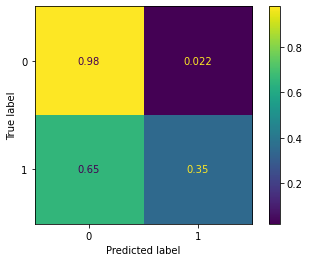

In [22]:
plot_confusion_matrix(model,X_Val, y_val,normalize='true')

In [23]:
# Get the predicted result for the test Data
test.bank_account = xg_model.predict(test)

/tmp/ipykernel_10389/3974449006.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = xg_model.predict(test)


In [24]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": uniqueid + " x " + country,
                           "bank_account": test.bank_account})

#show the five sample
submission.sample(5)

,uniqueid,bank_account
1542,uniqueid_7611 x Kenya,0
2049,uniqueid_8118 x Kenya,0
434,uniqueid_6503 x Kenya,1
2950,uniqueid_9085 x Rwanda,0
1721,uniqueid_7790 x Kenya,1


In [25]:
submission.to_csv('submission.csv', index = False)